In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path= '/content/drive/My Drive/shap_experiment/data'
df_processed_combined_data_daily = pd.read_csv(file_path+"/processed_combined_data_daily.csv")
df_processed_combined_data_daily_imputed_with_neighbors = pd.read_csv(file_path+"/processed_combined_imputed_with_neighbors_df_processed_combined_data_daily.csv")

df_processed_combined_data_daily.DateTime = pd.to_datetime(df_processed_combined_data_daily.DateTime)
df_processed_combined_data_daily_imputed_with_neighbors.DateTime = pd.to_datetime(df_processed_combined_data_daily_imputed_with_neighbors.DateTime)

Mounted at /content/drive


In [5]:
df_processed_combined_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        2179 non-null   datetime64[ns]
 1   wind_speed      1461 non-null   float64       
 2   wind_direction  1454 non-null   float64       
 3   precipitation   2165 non-null   float64       
 4   pressure        2178 non-null   float64       
 5   temperature     2179 non-null   float64       
 6   humidity        2165 non-null   float64       
 7   visibility      2178 non-null   float64       
 8   cloudiness      2178 non-null   float64       
 9   Bjelave_PM10    1770 non-null   float64       
 10  Bjelave_SO2     1031 non-null   float64       
 11  Bjelave_NO2     1751 non-null   float64       
 12  Bjelave_O3      1658 non-null   float64       
 13  Bjelave_CO      1065 non-null   float64       
 14  Ilidža_PM2.5    1231 non-null   float64       
 15  Ilid

In [6]:
# Ensure DateTime column is in datetime format
df_processed_combined_data_daily['DateTime'] = pd.to_datetime(df_processed_combined_data_daily['DateTime'], dayfirst=True)  # dayfirst=True if your dates are in DD.MM.YYYY format

In [7]:
df_processed_combined_data_daily.isnull().sum()

DateTime             0
wind_speed         718
wind_direction     725
precipitation       14
pressure             1
temperature          0
humidity            14
visibility           1
cloudiness           1
Bjelave_PM10       409
Bjelave_SO2       1148
Bjelave_NO2        428
Bjelave_O3         521
Bjelave_CO        1114
Ilidža_PM2.5       948
Ilidža_PM10        605
Ilidža_SO2         451
Ilidža_NO2         608
Ilidža_O3         1304
Vijećnica_PM10     867
Vijećnica_SO2      619
Vijećnica_NO2      596
Vijećnica_CO       815
Otoka_PM10         461
Otoka_SO2          472
Otoka_NO2          460
Otoka_O3           450
Ambasada_PM2.5     549
dtype: int64

In [8]:
df_processed_combined_data_daily.describe(include='all')

DateTime   wind_speed  wind_direction  precipitation  \
count                 2179  1461.000000     1454.000000    2165.000000   
mean   2020-12-25 00:00:00     1.855326      187.081891       0.125006   
min    2018-01-01 00:00:00     0.375000       75.869565       0.000000   
25%    2019-06-29 12:00:00     1.370833      160.968750       0.000000   
50%    2020-12-25 00:00:00     1.816667      183.583333       0.000000   
75%    2022-06-22 12:00:00     2.247826      209.947917       0.100000   
max    2023-12-19 00:00:00     5.720833      317.583333       3.673684   
std                    NaN     0.696712       40.346244       0.301308   

          pressure  temperature     humidity    visibility   cloudiness  \
count  2178.000000  2179.000000  2165.000000   2178.000000  2178.000000   
mean    943.400978    11.621358    67.851992  16117.841456     4.481947   
min     917.695833    -9.554167    22.583333    255.000000     0.000000   
25%     939.505208     5.177083    57.333333  14458.333333     2.300000   
50%     943.517029    12.170833    67.791667  18129.166667     4.827083   
75%     947.270516    18.112500    78.750000  18812.500000     6.698958   
max     968.000000    29.537500   100.000000  20000.000000     8.000000   
std       6.942886     8.114297    14.906403   4070.378997     2.503976   

       Bjelave_PM10  ...   Ilidža_O3  Vijećnica_PM10  Vijećnica_SO2  \
count   1770.000000  ...  875.000000     1312.000000    1560.000000   
mean      39.262175  ...   31.001008       35.986101      13.261818   
min        2.206643  ...    0.244000        0.999990      -0.303750   
25%       19.820716  ...   13.576072       18.470192       4.867187   
50%       28.638063  ...   26.613864       26.147009       9.592083   
75%       42.243279  ...   38.768958       37.686844      17.514167   
max      486.234628  ...  272.438250      395.955999     141.110417   
std       39.538844  ...   27.882650       36.737921      12.994571   

       Vijećnica_NO2  Vijećnica_CO   Otoka_PM10    Otoka_SO2    Otoka_NO2  \
count    1583.000000   1364.000000  1718.000000  1707.000000  1719.000000   
mean       21.900504      0.657256    51.605229    23.966773    36.953554   
min         0.450000     -0.014348     4.545455     0.766965     5.359414   
25%        14.207083      0.250312    22.569746    10.039354    25.187102   
50%        18.328333      0.420000    33.083333    18.370717    33.319338   
75%        26.027500      0.918958    59.458333    31.856414    43.975385   
max       107.155417      7.117500   421.833333   150.203708   123.765896   
std        12.617951      0.662767    51.623567    19.226377    17.418296   

          Otoka_O3  Ambasada_PM2.5  
count  1729.000000     1630.000000  
mean     30.461240       36.466675  
min       0.610833        2.791667  
25%      15.299583       13.541667  
50%      28.174167       20.104167  
75%      41.957500       37.583333  
max     131.065001      476.083333  
std      18.737884       46.938583  

[8 rows x 28 columns]

In [9]:
feature_columns=['DateTime', 'Bjelave_PM10','wind_speed','wind_direction','precipitation','pressure', 'temperature','humidity','visibility','cloudiness','Bjelave_SO2','Bjelave_NO2']
df_processed_combined_data_daily[feature_columns].describe()

DateTime  Bjelave_PM10   wind_speed  wind_direction  \
count                 2179   1770.000000  1461.000000     1454.000000   
mean   2020-12-25 00:00:00     39.262175     1.855326      187.081891   
min    2018-01-01 00:00:00      2.206643     0.375000       75.869565   
25%    2019-06-29 12:00:00     19.820716     1.370833      160.968750   
50%    2020-12-25 00:00:00     28.638063     1.816667      183.583333   
75%    2022-06-22 12:00:00     42.243279     2.247826      209.947917   
max    2023-12-19 00:00:00    486.234628     5.720833      317.583333   
std                    NaN     39.538844     0.696712       40.346244   

       precipitation     pressure  temperature     humidity    visibility  \
count    2165.000000  2178.000000  2179.000000  2165.000000   2178.000000   
mean        0.125006   943.400978    11.621358    67.851992  16117.841456   
min         0.000000   917.695833    -9.554167    22.583333    255.000000   
25%         0.000000   939.505208     5.177083    57.333333  14458.333333   
50%         0.000000   943.517029    12.170833    67.791667  18129.166667   
75%         0.100000   947.270516    18.112500    78.750000  18812.500000   
max         3.673684   968.000000    29.537500   100.000000  20000.000000   
std         0.301308     6.942886     8.114297    14.906403   4070.378997   

        cloudiness  Bjelave_SO2  Bjelave_NO2  
count  2178.000000  1031.000000  1751.000000  
mean      4.481947    14.540061    19.460646  
min       0.000000     0.588175     2.252868  
25%       2.300000     4.415428    11.380406  
50%       4.827083     9.122092    15.699687  
75%       6.698958    18.308281    24.269484  
max       8.000000   166.777405   105.087328  
std       2.503976    17.269619    12.492042

In [10]:
means = df_processed_combined_data_daily[feature_columns].mean()
medians = df_processed_combined_data_daily[feature_columns].median()
modes = df_processed_combined_data_daily[feature_columns].mode()
stds = df_processed_combined_data_daily[feature_columns].std()

#var = df_processed_combined_data_daily[feature_columns].var()
df_processed_combined_data_daily_mean_median_std= pd.DataFrame({'mean': means, 'median': medians, 'std': stds})

df_processed_combined_data_daily_mean_median_std

mean               median  \
DateTime        2020-12-25 00:00:00  2020-12-25 00:00:00   
Bjelave_PM10              39.262175            28.638063   
wind_speed                 1.855326             1.816667   
wind_direction           187.081891           183.583333   
precipitation              0.125006                  0.0   
pressure                 943.400978           943.517029   
temperature               11.621358            12.170833   
humidity                  67.851992            67.791667   
visibility             16117.841456         18129.166667   
cloudiness                 4.481947             4.827083   
Bjelave_SO2               14.540061             9.122092   
Bjelave_NO2               19.460646            15.699687   

                                        std  
DateTime        629 days 04:01:06.754925896  
Bjelave_PM10                      39.538844  
wind_speed                         0.696712  
wind_direction                    40.346244  
precipitation                      0.301308  
pressure                           6.942886  
temperature                        8.114297  
humidity                          14.906403  
visibility                      4070.378997  
cloudiness                         2.503976  
Bjelave_SO2                       17.269619  
Bjelave_NO2                       12.492042

In [11]:
pollutants =['Bjelave_PM10', 'Bjelave_SO2', 'Bjelave_NO2']

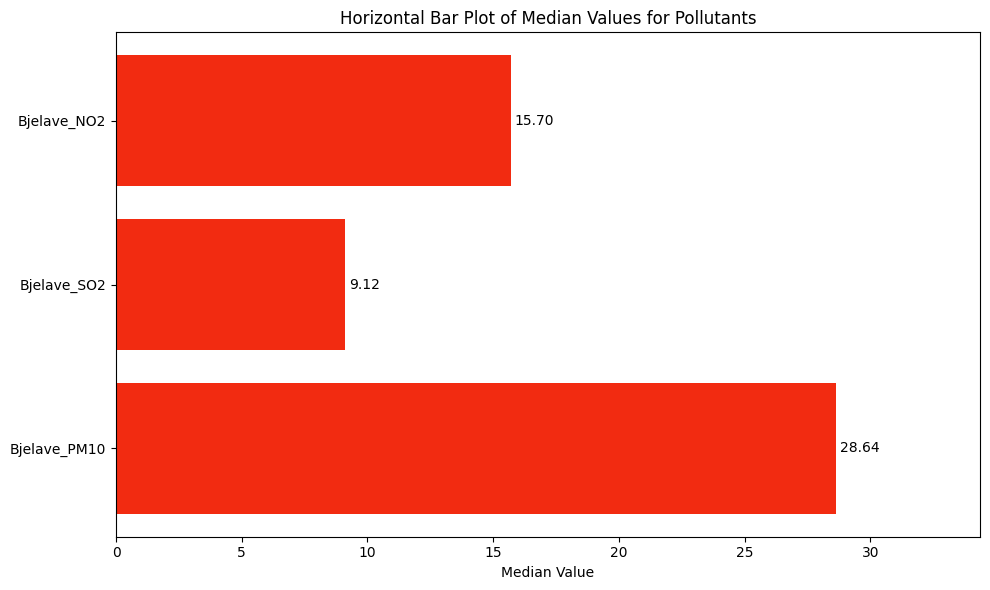

In [12]:
import matplotlib.pyplot as plt

medians = df_processed_combined_data_daily[pollutants].median()
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(medians.index, medians.values, color='#f22b11')

ax.bar_label(bars, fmt='%.2f', padding=3)
ax.set_xlabel("Median Value")
ax.set_title("Horizontal Bar Plot of Median Values for Pollutants")

ax.set_xlim(0, medians.max() * 1.2)

plt.tight_layout()
plt.show()

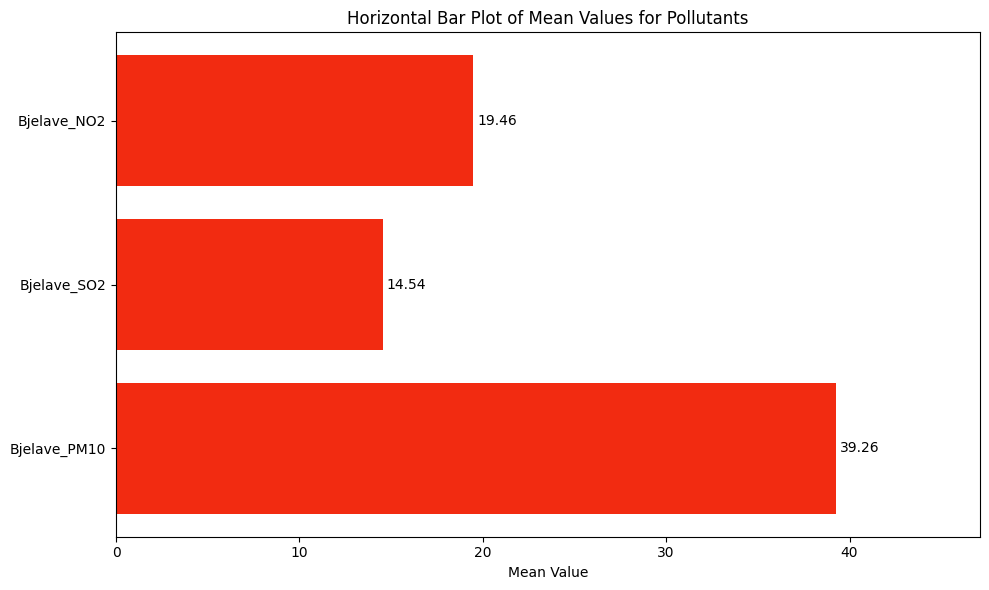

In [13]:
means = df_processed_combined_data_daily[pollutants].mean()

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(means.index, means.values, color='#f22b11')

ax.bar_label(bars, fmt='%.2f', padding=3)

ax.set_xlabel("Mean Value")
ax.set_title("Horizontal Bar Plot of Mean Values for Pollutants")

ax.set_xlim(0, means.max() * 1.2)

plt.tight_layout()
plt.show()

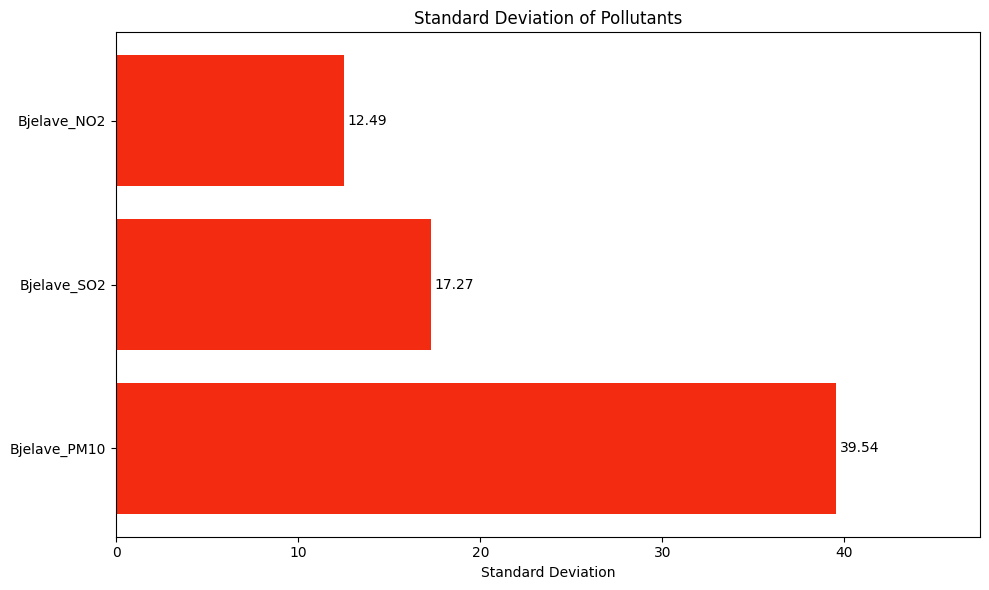

In [14]:
stds = df_processed_combined_data_daily[pollutants].std()


fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(stds.index, stds.values, color='#f22b11')

ax.bar_label(bars, fmt='%.2f', padding=3)

ax.set_xlabel("Standard Deviation")
ax.set_title("Standard Deviation of Pollutants")

ax.set_xlim(0, stds.max() * 1.2)

plt.tight_layout()
plt.show()

In [15]:
feature_columns

['DateTime',
 'Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [16]:
feature_columns.remove('DateTime')
var = df_processed_combined_data_daily[feature_columns].var()

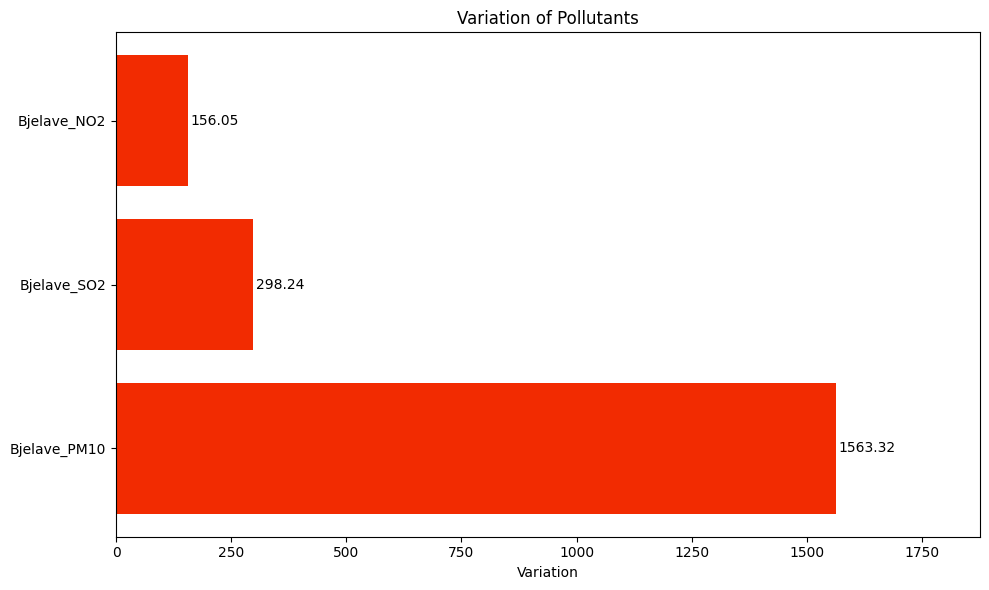

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(var[pollutants].index, var[pollutants].values, color='#f22b01')

ax.bar_label(bars, fmt='%.2f', padding=2)

ax.set_xlabel("Variation")
ax.set_title("Variation of Pollutants")

ax.set_xlim(0, var[pollutants].max() * 1.2)

plt.tight_layout()
plt.show()

In [18]:
feature_columns

['Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [19]:
feature_columns.insert(0,'DateTime')
var = pd.DataFrame({'var': var})
#feature_columns.insert(0,'DateTime')
var

var
Bjelave_PM10    1.563320e+03
wind_speed      4.854077e-01
wind_direction  1.627819e+03
precipitation   9.078670e-02
pressure        4.820367e+01
temperature     6.584181e+01
humidity        2.222009e+02
visibility      1.656799e+07
cloudiness      6.269896e+00
Bjelave_SO2     2.982398e+02
Bjelave_NO2     1.560511e+02

In [20]:
min = df_processed_combined_data_daily[feature_columns].min()
max = df_processed_combined_data_daily[feature_columns].max()
range = max-min

df_processed_combined_data_daily_min_max_range = pd.DataFrame({'min': min, 'max': max, 'range': range})

df_processed_combined_data_daily_min_max_range

min                  max               range
DateTime        2018-01-01 00:00:00  2023-12-19 00:00:00  2178 days 00:00:00
Bjelave_PM10               2.206643           486.234628          484.027985
wind_speed                    0.375             5.720833            5.345833
wind_direction            75.869565           317.583333          241.713768
precipitation                   0.0             3.673684            3.673684
pressure                 917.695833                968.0           50.304167
temperature               -9.554167              29.5375           39.091667
humidity                  22.583333                100.0           77.416667
visibility                    255.0              20000.0             19745.0
cloudiness                      0.0                  8.0                 8.0
Bjelave_SO2                0.588175           166.777405          166.189229
Bjelave_NO2                2.252868           105.087328           102.83446

In [28]:
colors = [
    '#0F5257',         # for Bjelave_PM10
    'blue',
    'lightblue',
    '#e31739',
    'darkgreen',
    'darkorange',
    'purple',
    'pink',
    '#D1B1C8',
    '#9B9FB5',
    '#7A6174'
]

In [27]:
def plot_data(df, label, color='#0F5257'):
    plt.figure(figsize=(15,8))
    plt.plot(df['DateTime'], df[label], color=color, label=label)
    #plt.plot(test_data[date_column], test_data[label], color='orange', label='Test Data')
    plt.xlabel('DateTime')
    plt.ylabel(label)
    plt.title(label)
    plt.legend()
    plt.show()

def plot_data(df, label, color='#0F5257', ax=1):
    ax.plot(df['DateTime'], df[label], color=color, label=label)
    ax.set_xlabel('DateTime')
    ax.set_ylabel(label)
    ax.set_title(label)
    ax.legend()

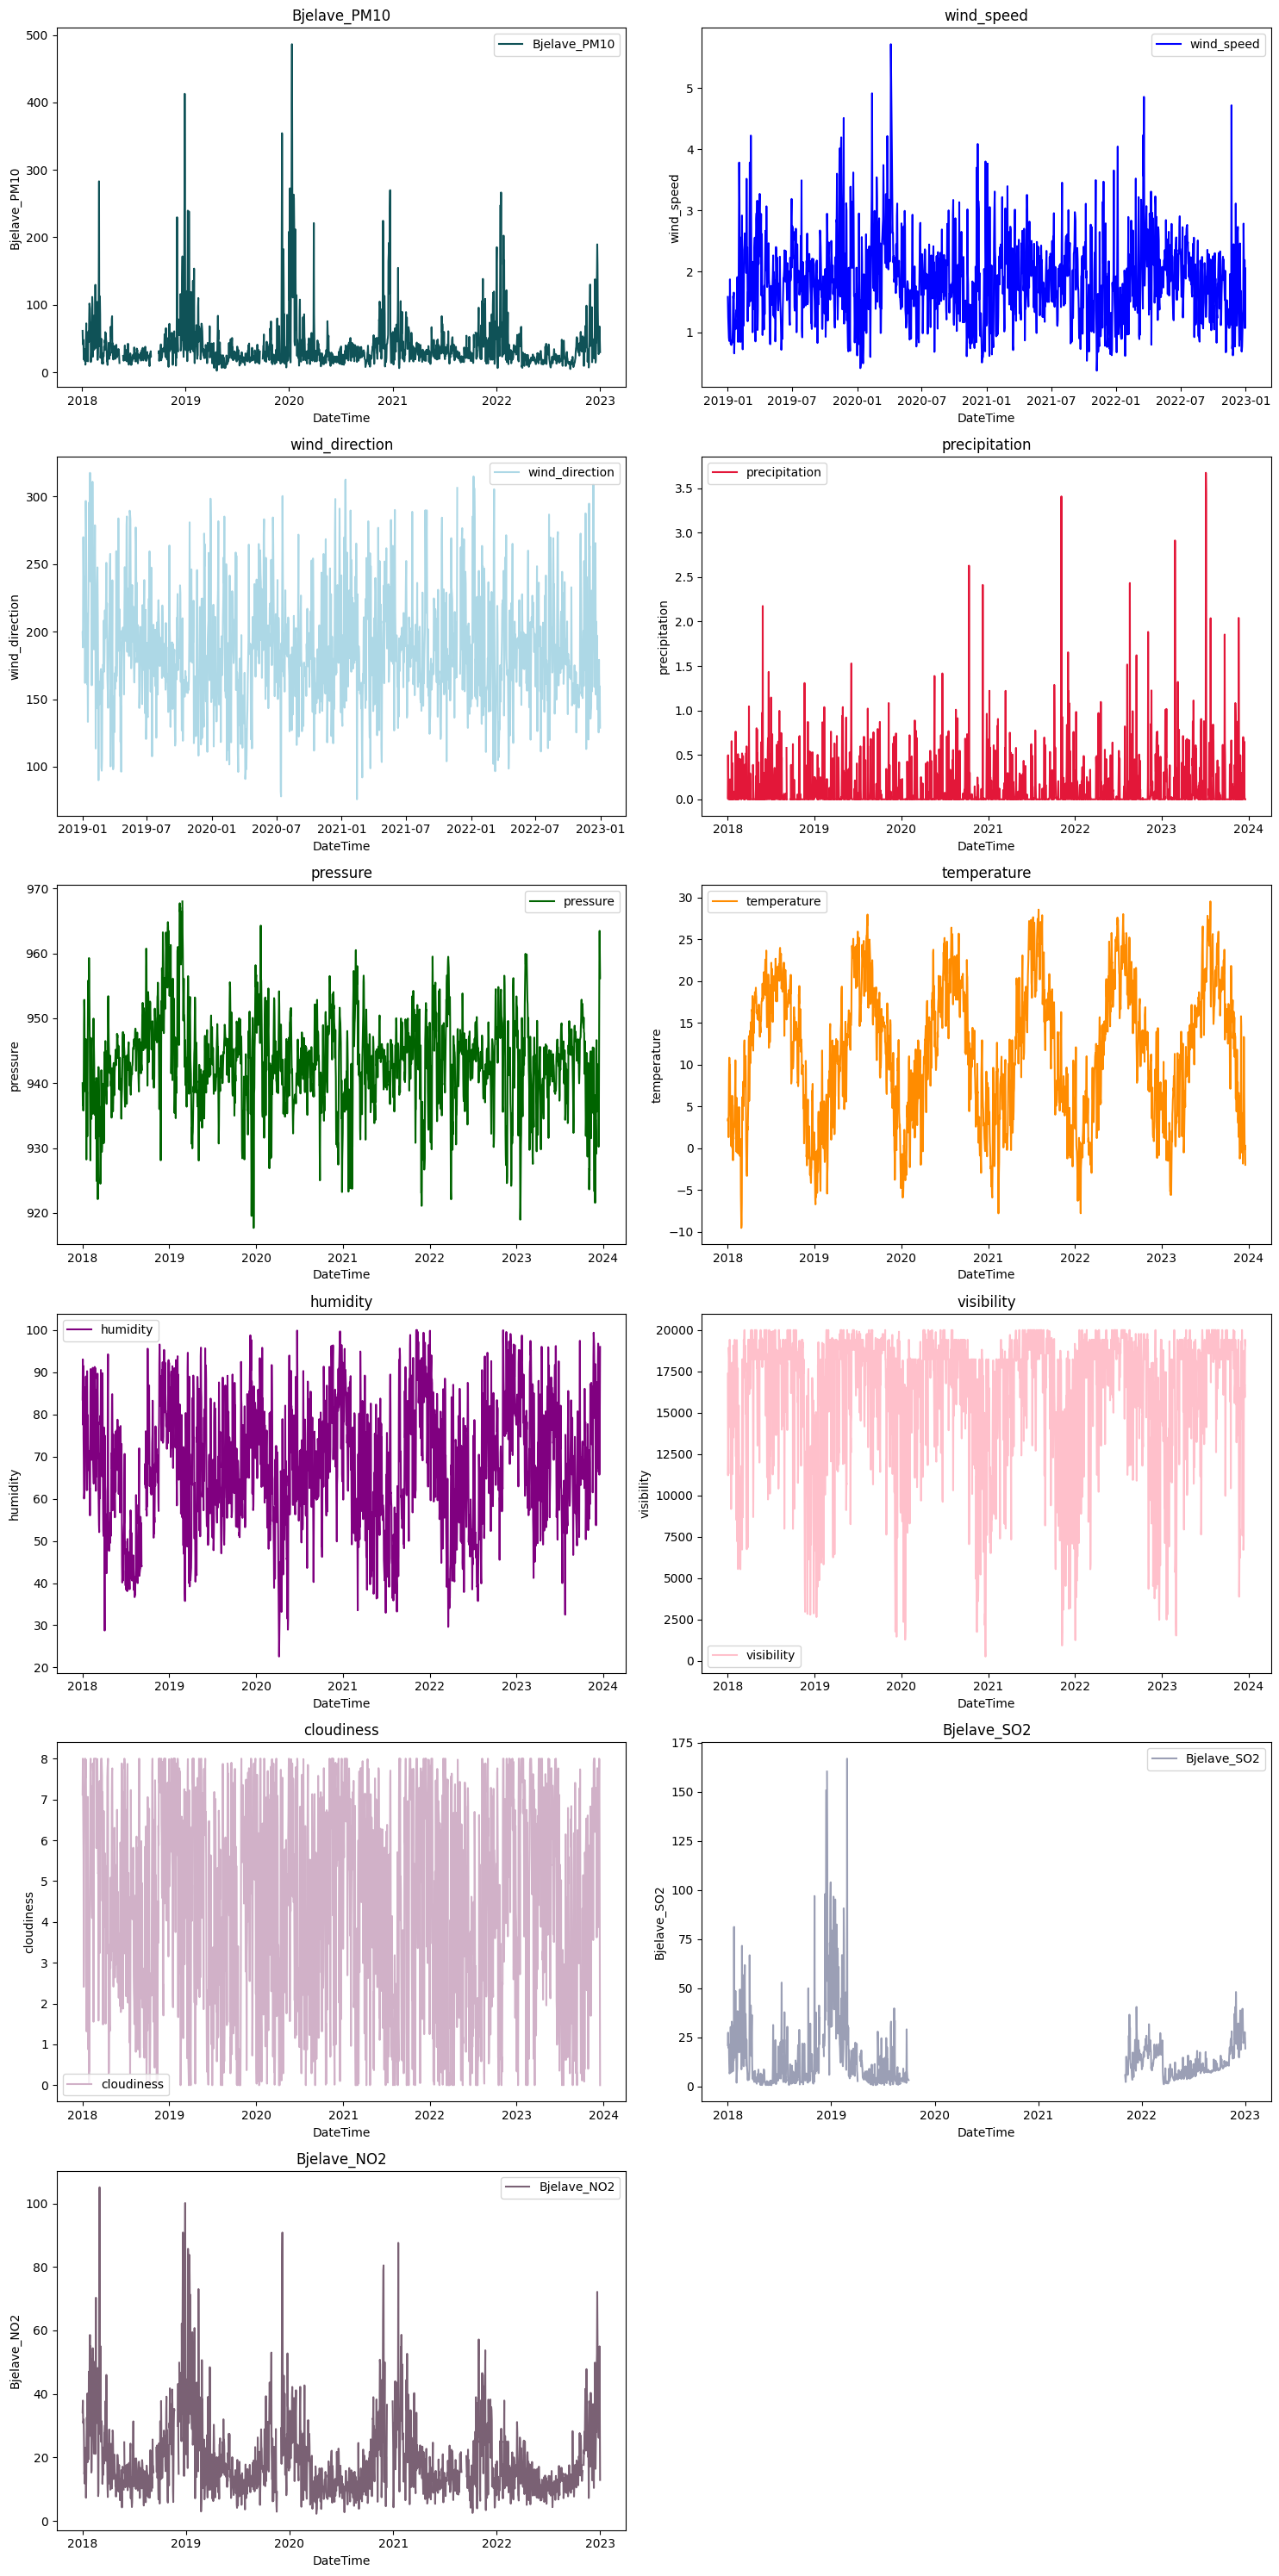

In [30]:
#df_processed_combined_data_daily
feature_columns.remove('DateTime')
num_plots = len(feature_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, (col, color) in enumerate(zip(feature_columns, colors)):
    plot_data(df_processed_combined_data_daily, label=col, color=color, ax=axes[i])

if num_plots < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

feature_columns.insert(0,'DateTime')

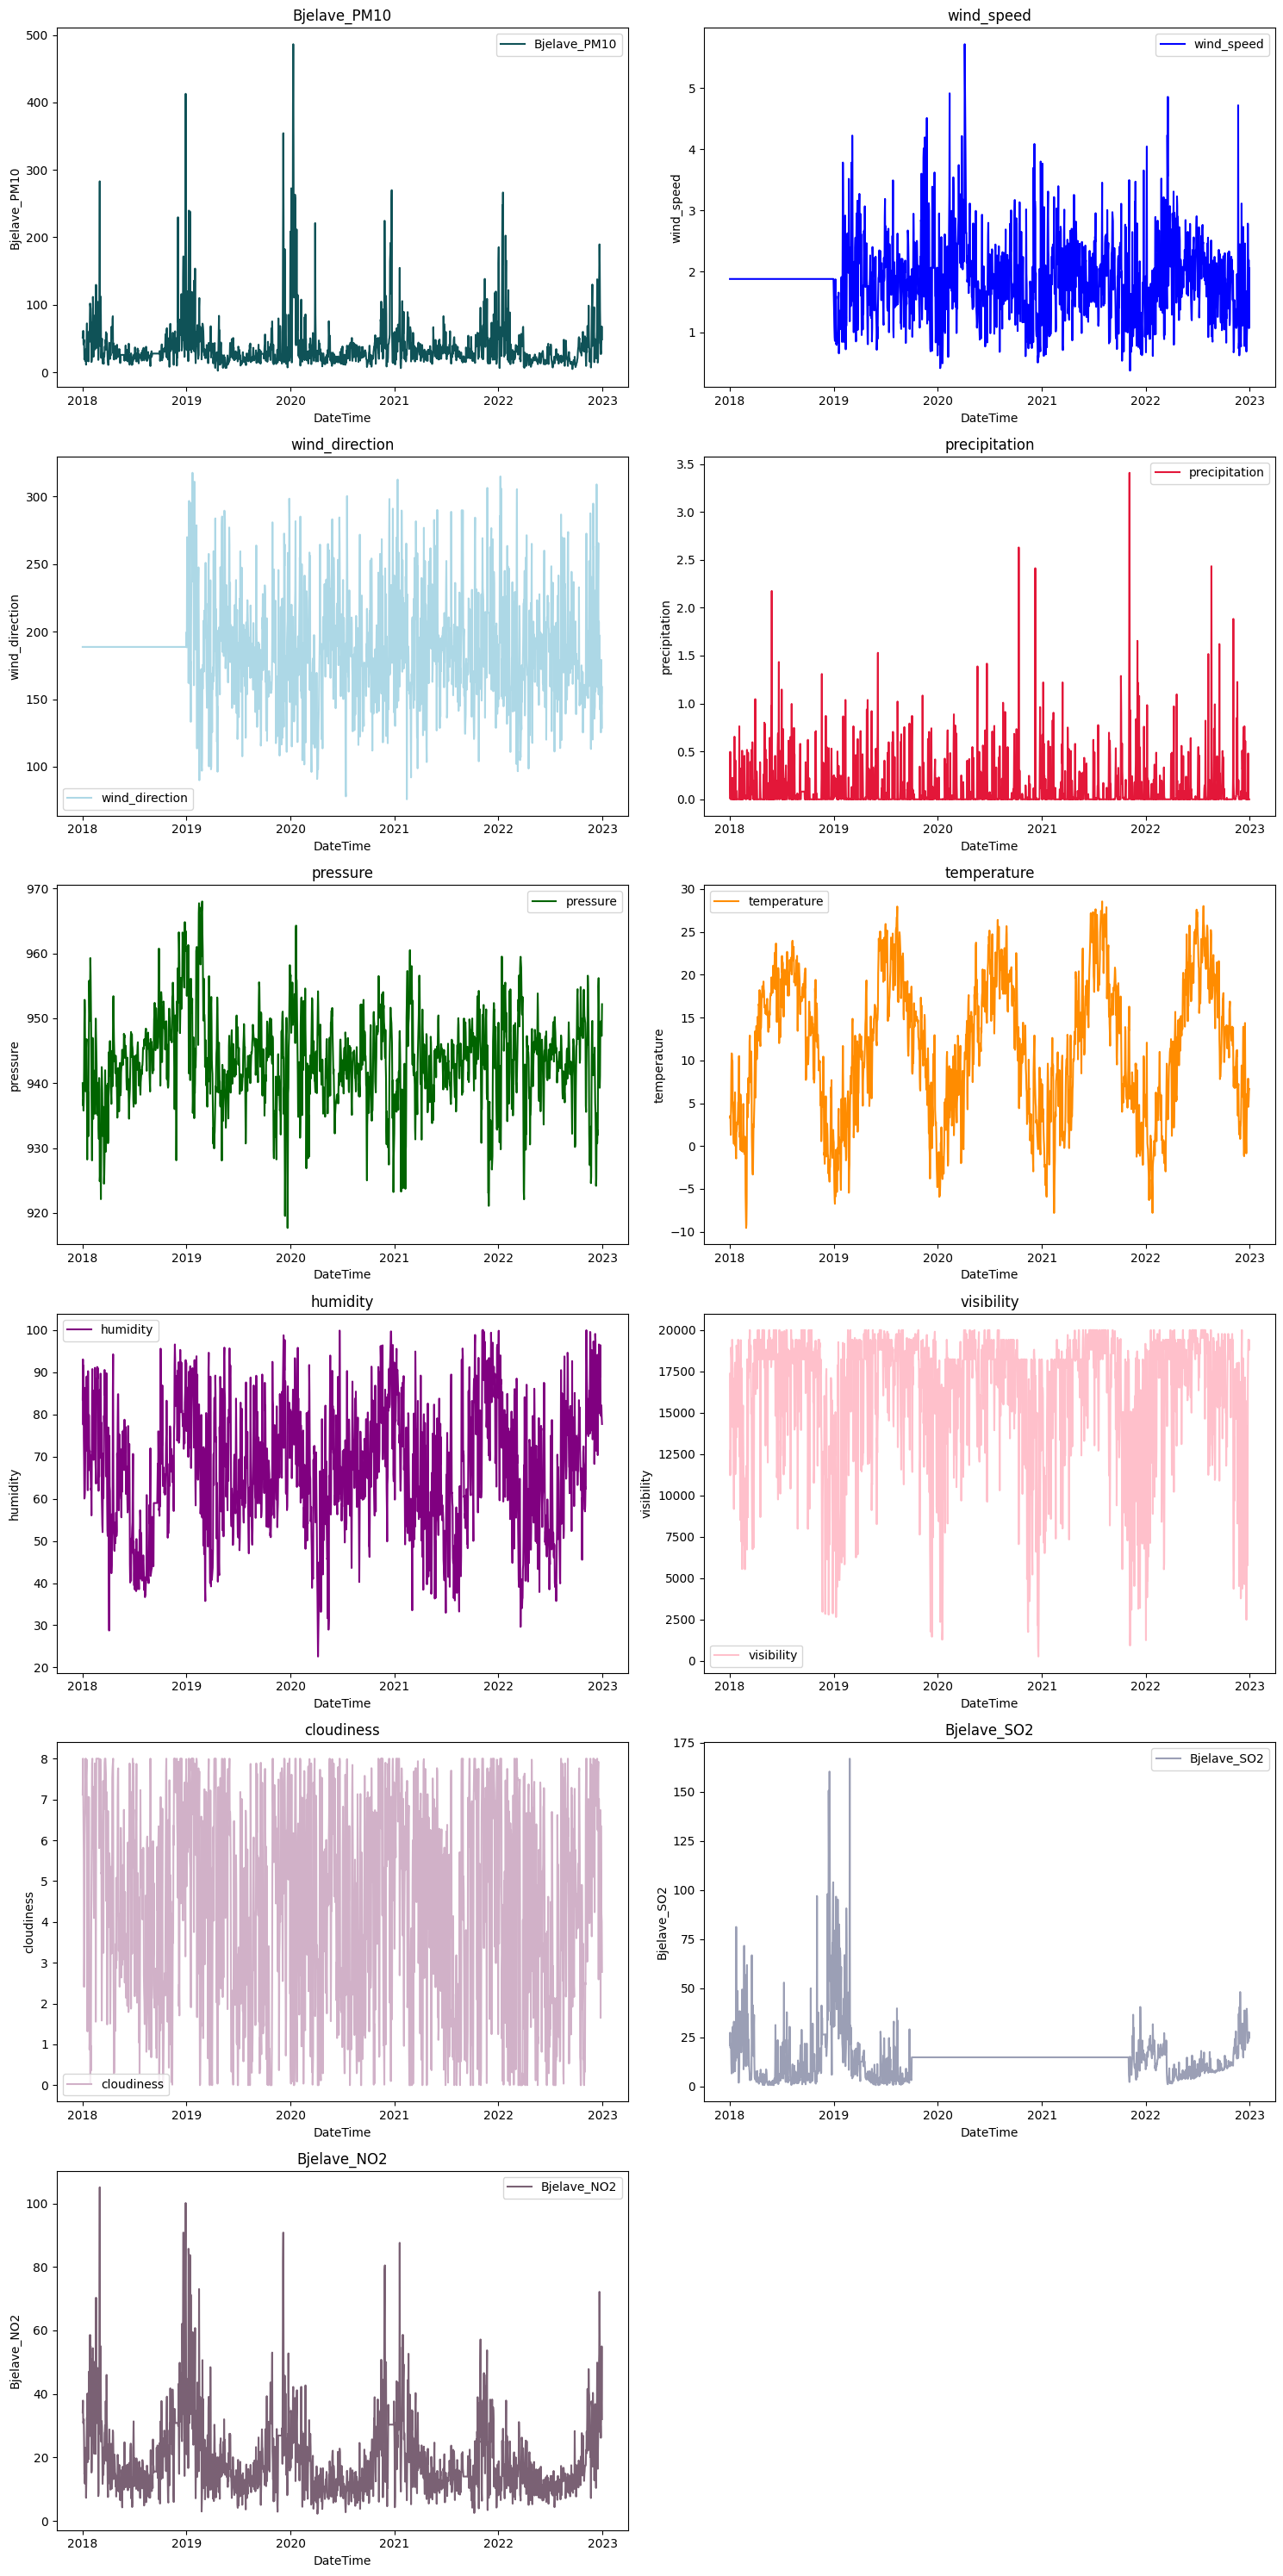

In [29]:
# df_processed_combined_data_daily_imputed_with_neighbors
feature_columns.remove('DateTime')
num_plots = len(feature_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, (col, color) in enumerate(zip(feature_columns, colors)):
    plot_data(df_processed_combined_data_daily_imputed_with_neighbors, label=col, color=color, ax=axes[i])

if num_plots < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

feature_columns.insert(0,'DateTime')

In [25]:
import matplotlib.pyplot as plt

def boxplot_data(df, label, ax):
    ax.boxplot(df[label].dropna())  # Drop NA values
    ax.set_title(f'Boxplot of {label}')
    ax.set_ylabel('Values')

    if len(label) > 10:
        ax.tick_params(axis='x', rotation=45)

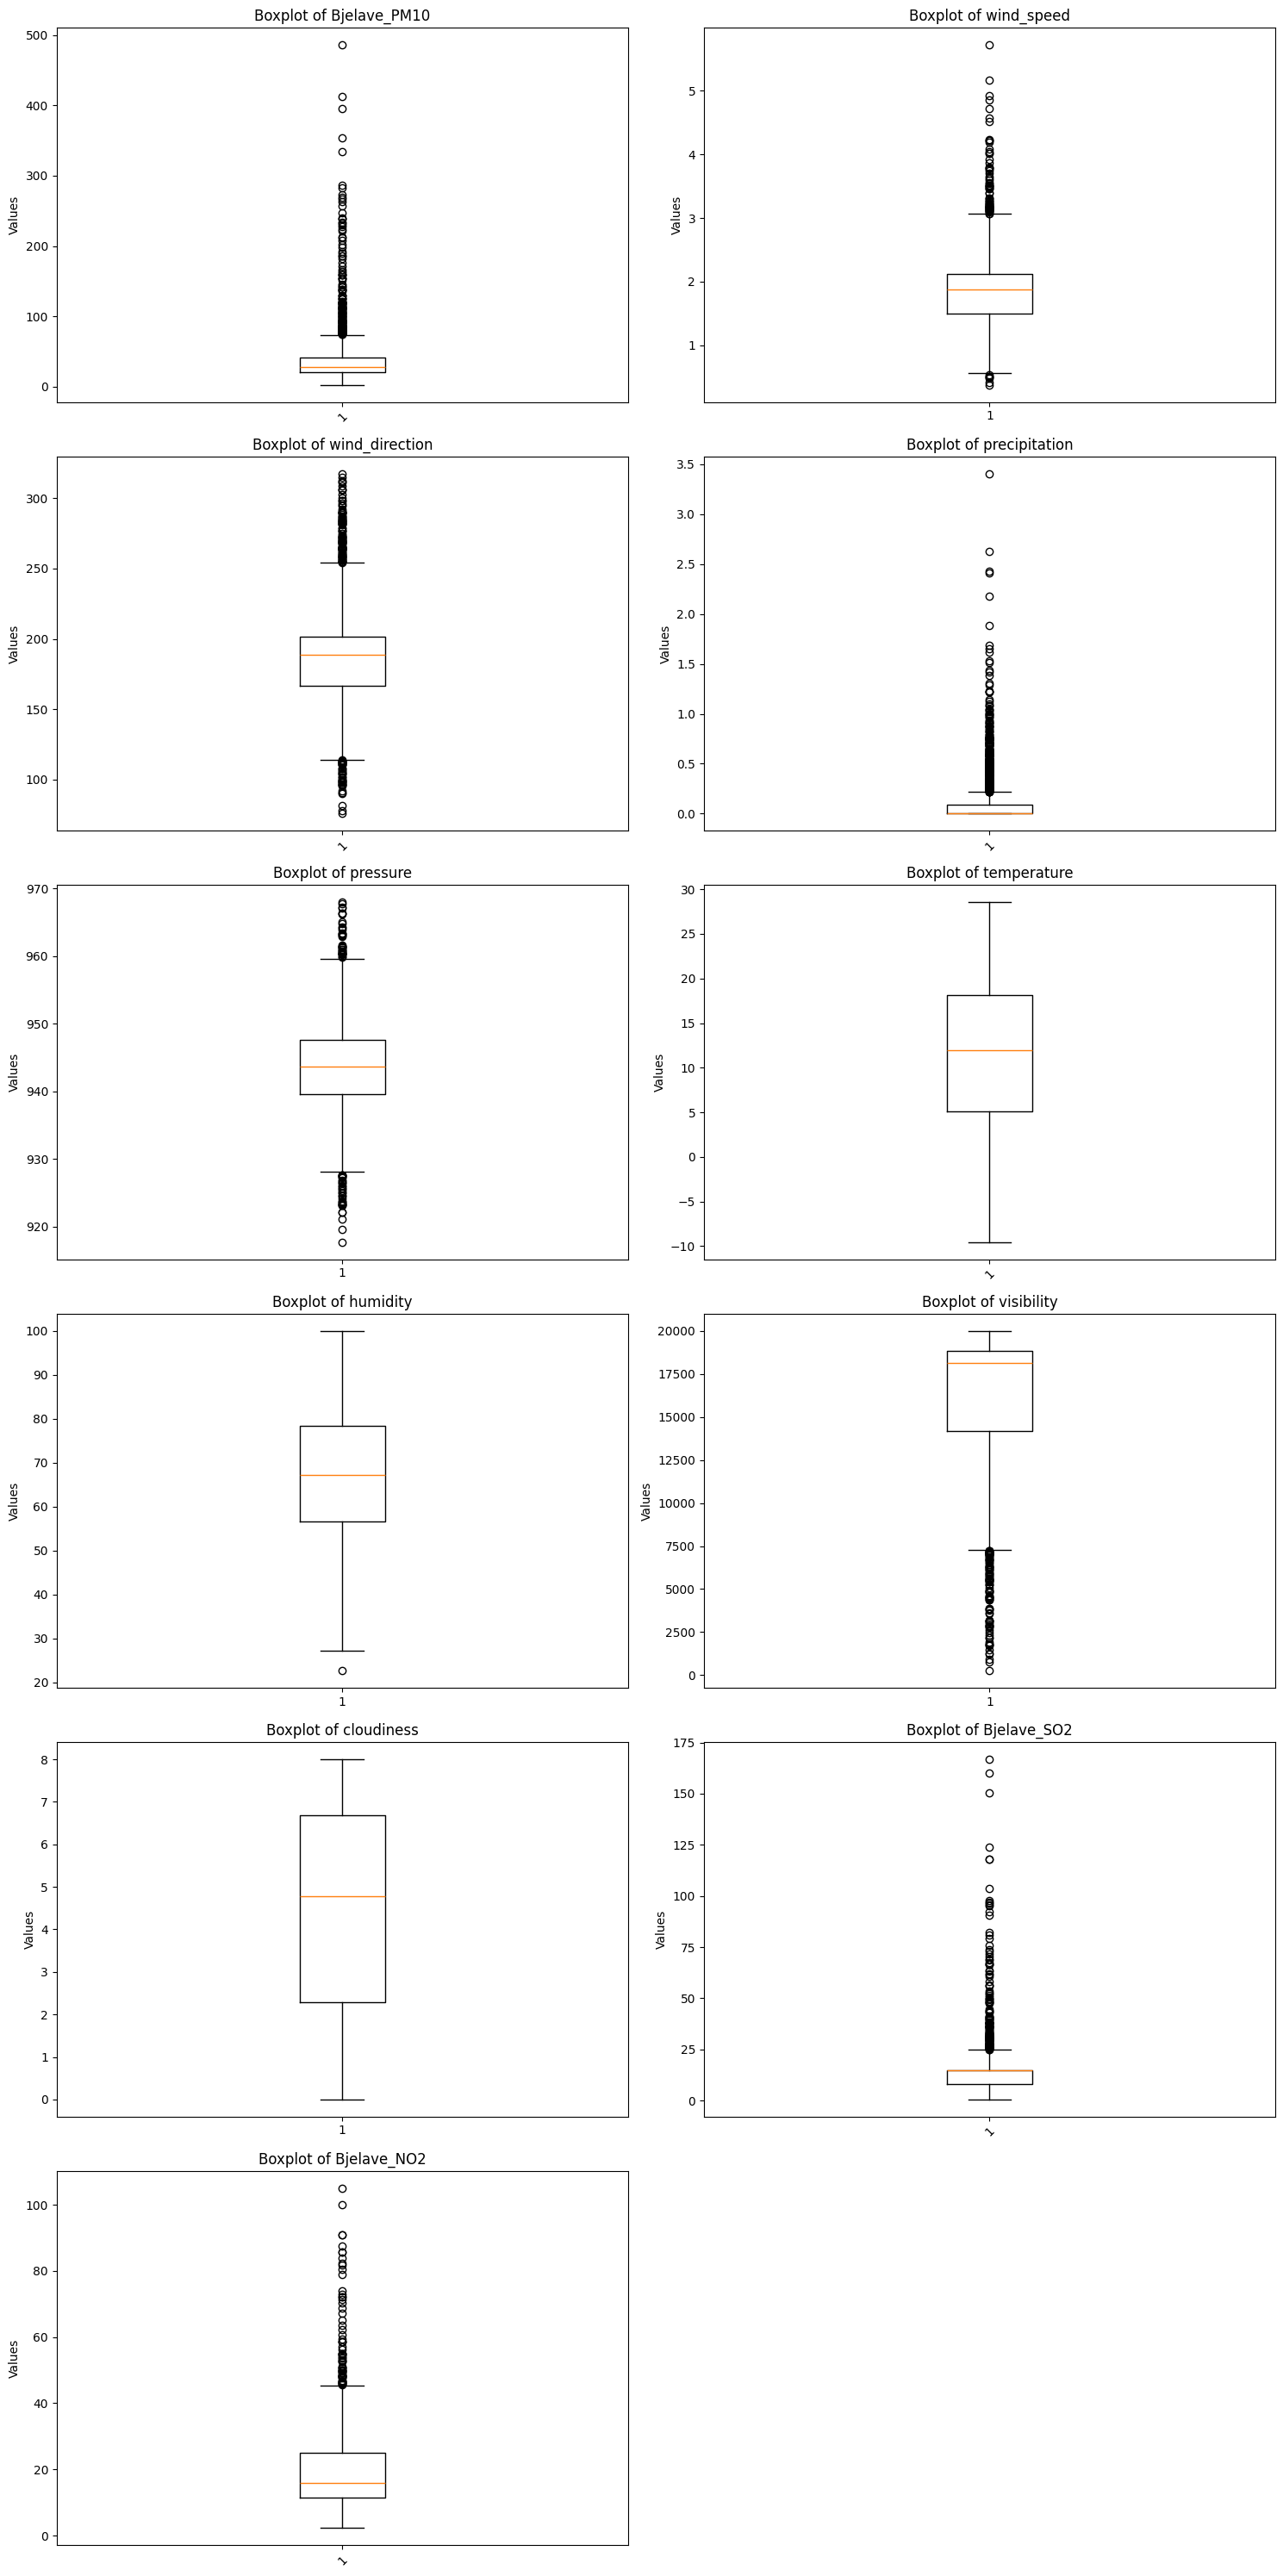

In [26]:
feature_columns.remove('DateTime')
num_plots = len(feature_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(feature_columns):
    boxplot_data(df_processed_combined_data_daily_imputed_with_neighbors, label=col, ax=axes[i])

if num_plots < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

feature_columns.insert(0,'DateTime')

In [36]:
def scatter_plot_data(df, label, ax):
    ax.scatter(df['DateTime'], df[label], c=df[label], cmap='Spectral')
    fig = ax.get_figure()
    fig.colorbar(ax.collections[0], ax=ax)
    ax.set_xlabel('DateTime')
    ax.set_ylabel(label)
    ax.set_title(label)

def correlation_plot(df, label1='Bjelave_PM10', label2='wind_speed',label3='pressure', label4=''):
    #plt.figure(figsize=(10,8))
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.scatter(df[label1], df[label2], label=''+label2+f' – correlation with {label1} = {np.round(np.corrcoef(df[label1],df[label2])[0,1], 2)}', alpha=0.5)
    plt.scatter(df[label1], df[label3], label=''+label3+f' – correlation with {label1} = {np.round(np.corrcoef(df[label1],df[label3])[0,1], 2)}', alpha=0.4)
    if(label4!=''):
      plt.scatter(df[label1], df[label4], label=''+label4+f' – correlation with {label1} = {np.round(np.corrcoef(df[label1],df[label4])[0,1], 2)}', alpha=0.45)
    plt.xlabel('DateTime')
    plt.title('Scatterplot and Correlations')
    plt.legend()
    plt.show()

In [37]:
feature_columns

['DateTime',
 'Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

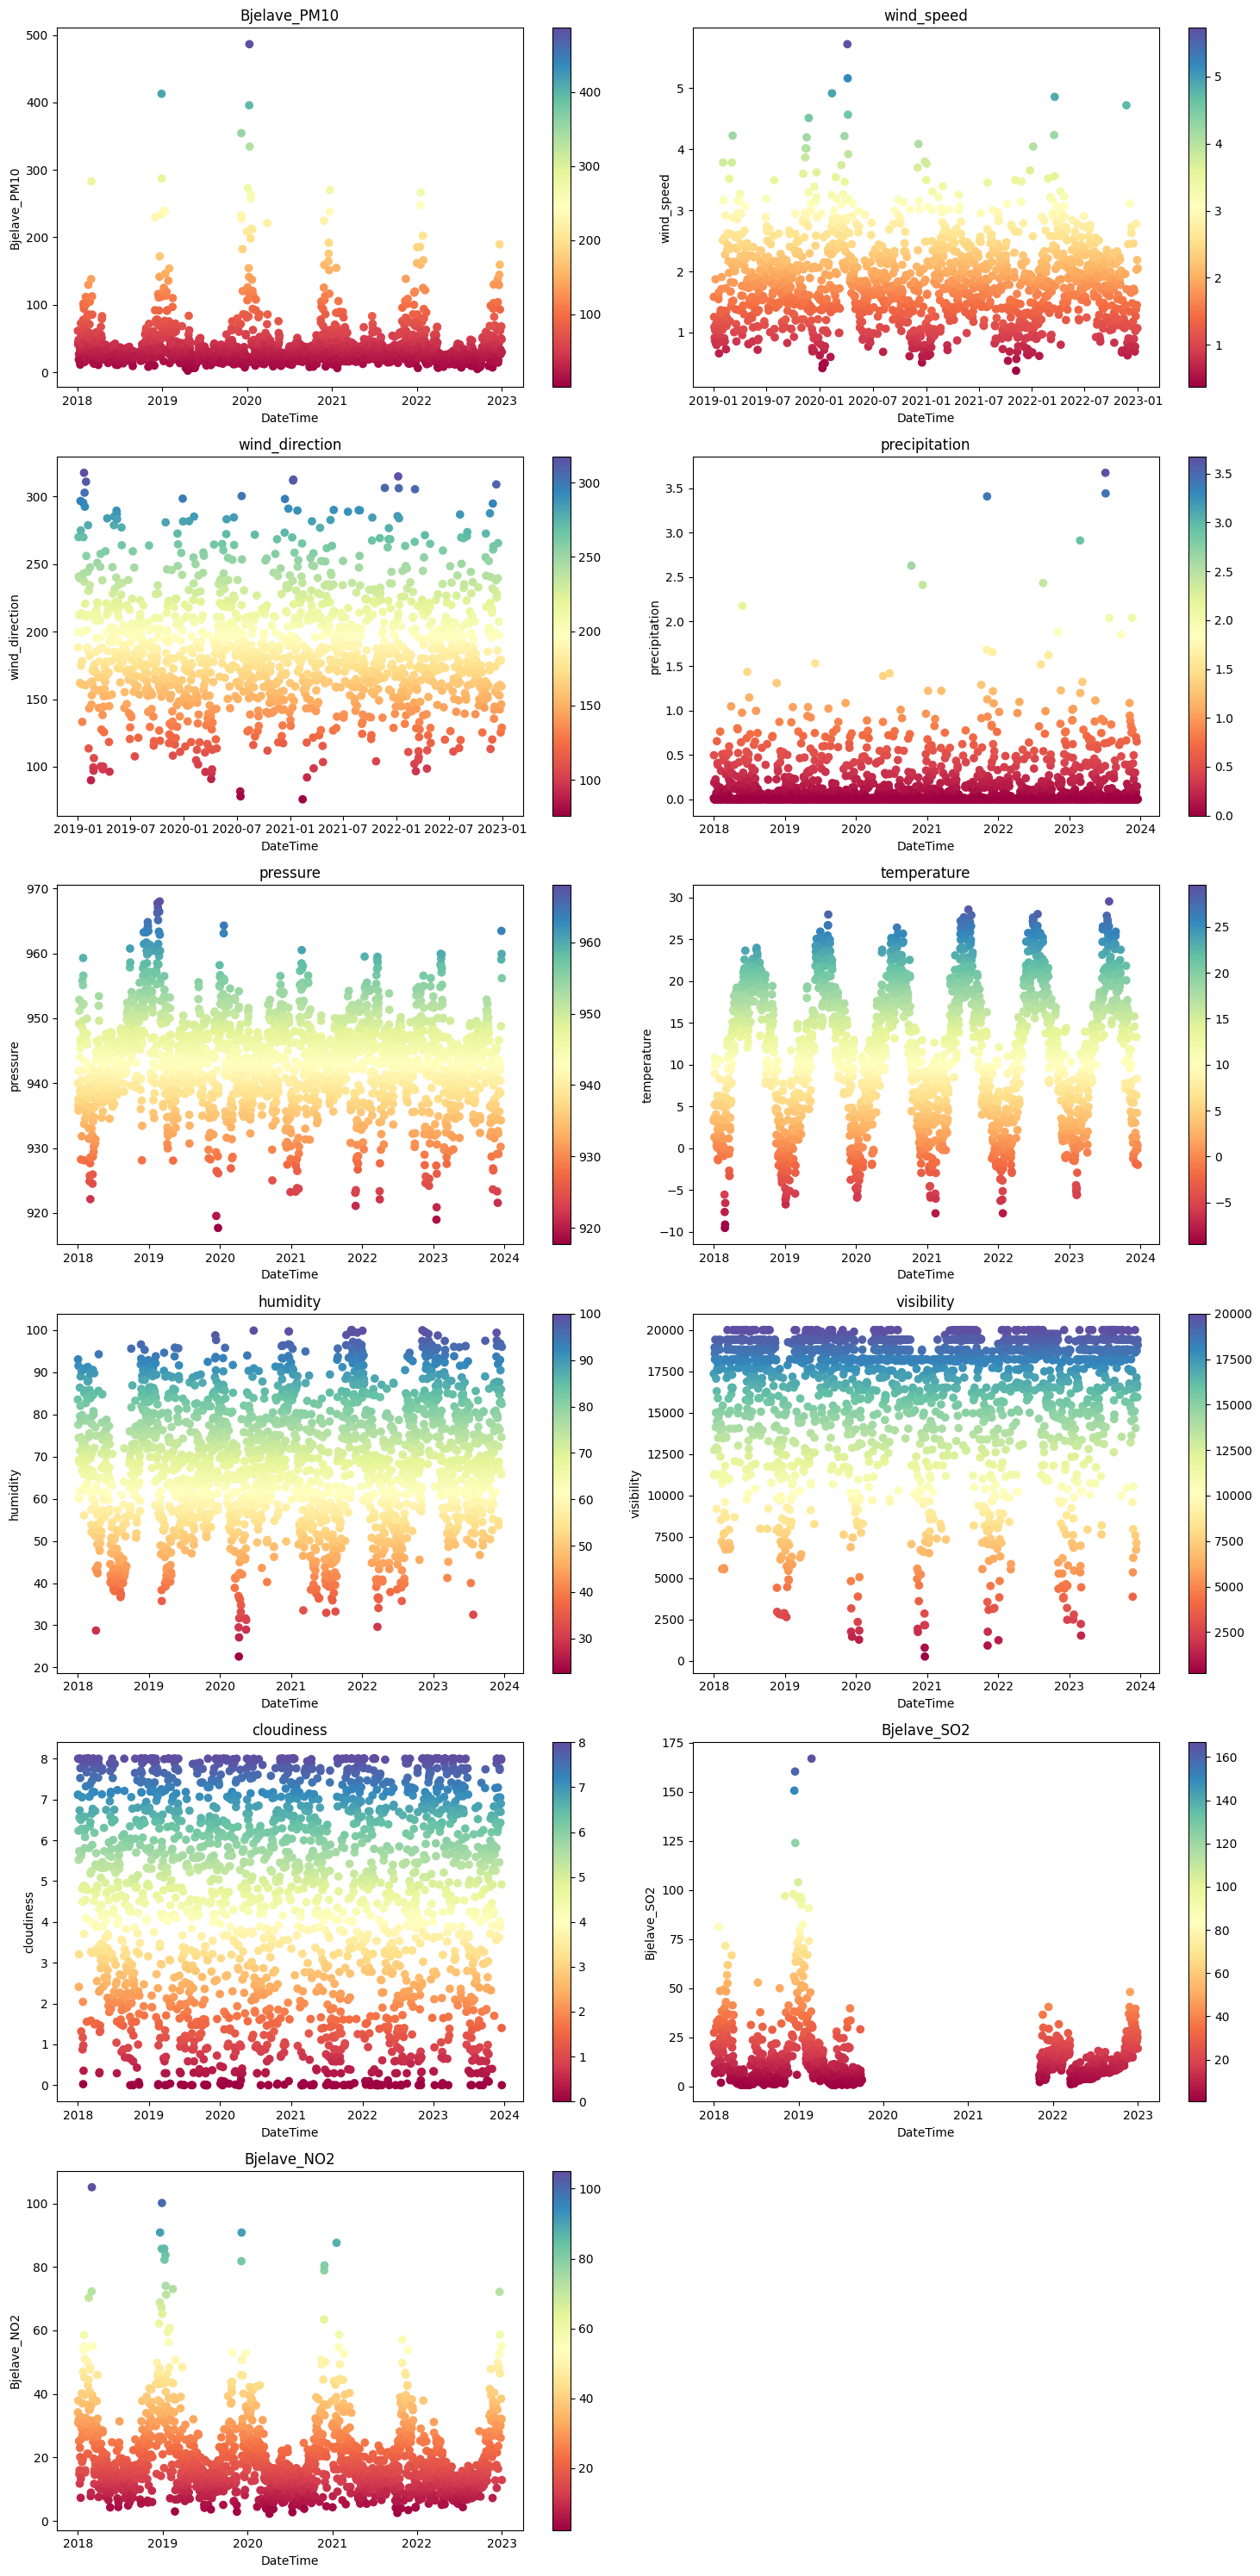

In [38]:
# dataset: df_processed_combined_data_daily
feature_columns.remove('DateTime')
num_plots = len(feature_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(feature_columns):
    scatter_plot_data(df_processed_combined_data_daily, label=col, ax=axes[i])

if num_plots < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#feature_columns.insert(0,'DateTime')

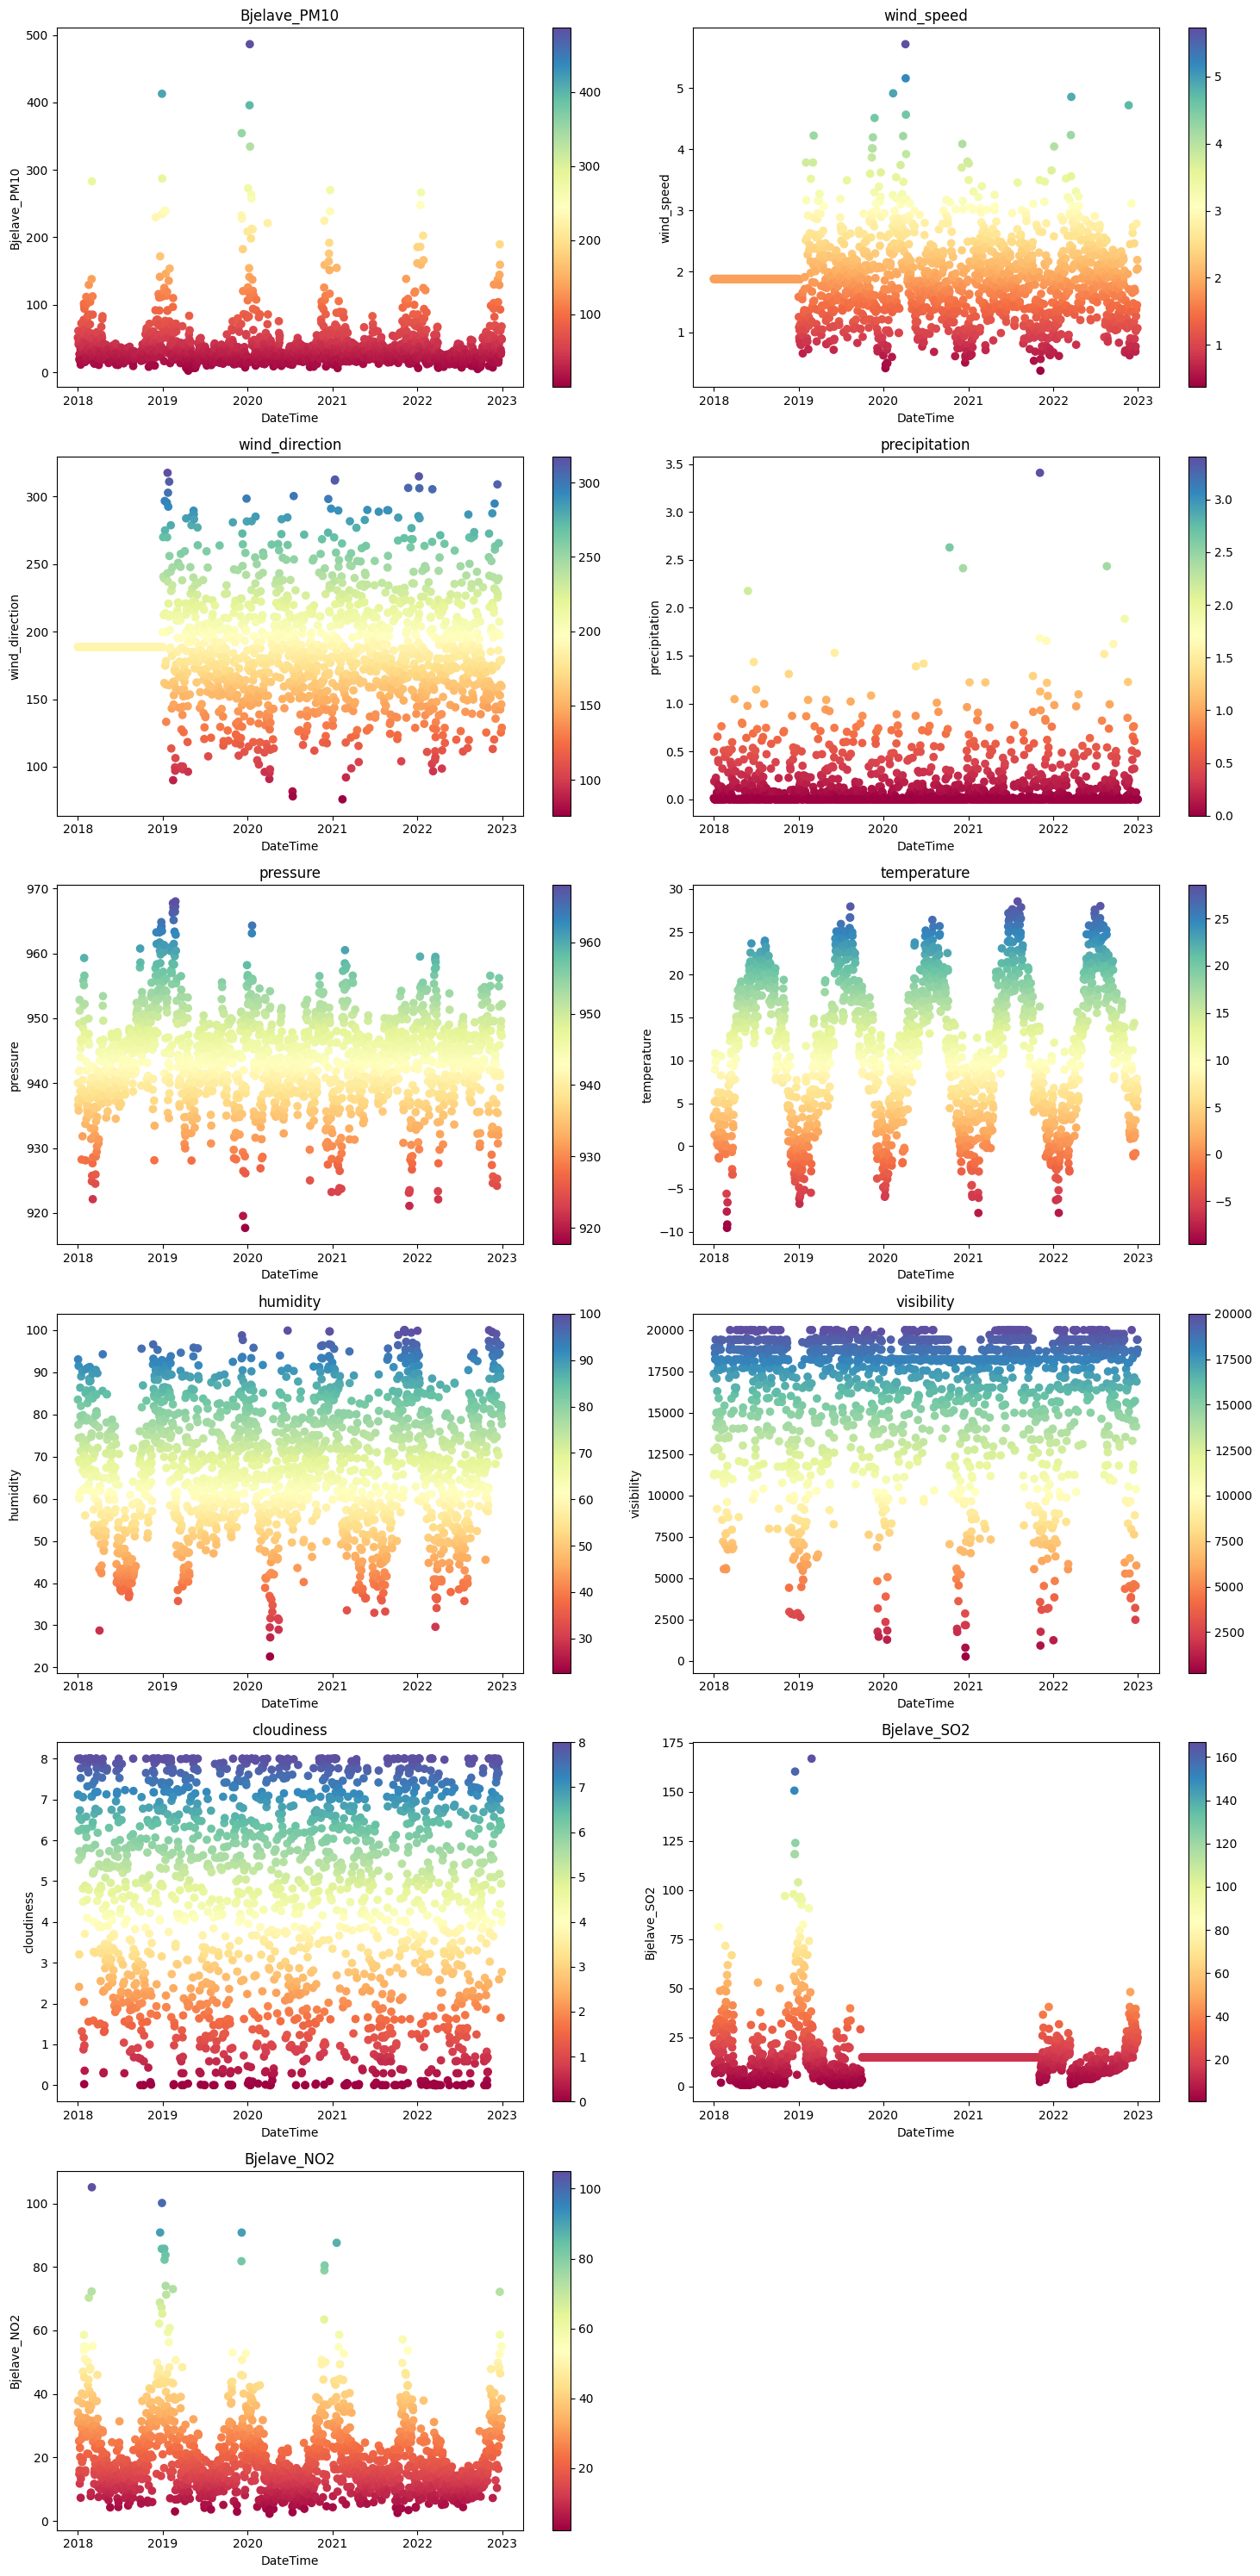

In [39]:
# dataset: df_processed_combined_data_daily_imputed_with_neighbors
#feature_columns.remove('DateTime')
num_plots = len(feature_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(feature_columns):
    scatter_plot_data(df_processed_combined_data_daily_imputed_with_neighbors, label=col, ax=axes[i])

if num_plots < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

feature_columns.insert(0,'DateTime')

In [40]:
feature_columns

['DateTime',
 'Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [41]:
df_processed_combined_data_daily_imputed_with_neighbors.columns

Index(['DateTime', 'wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')

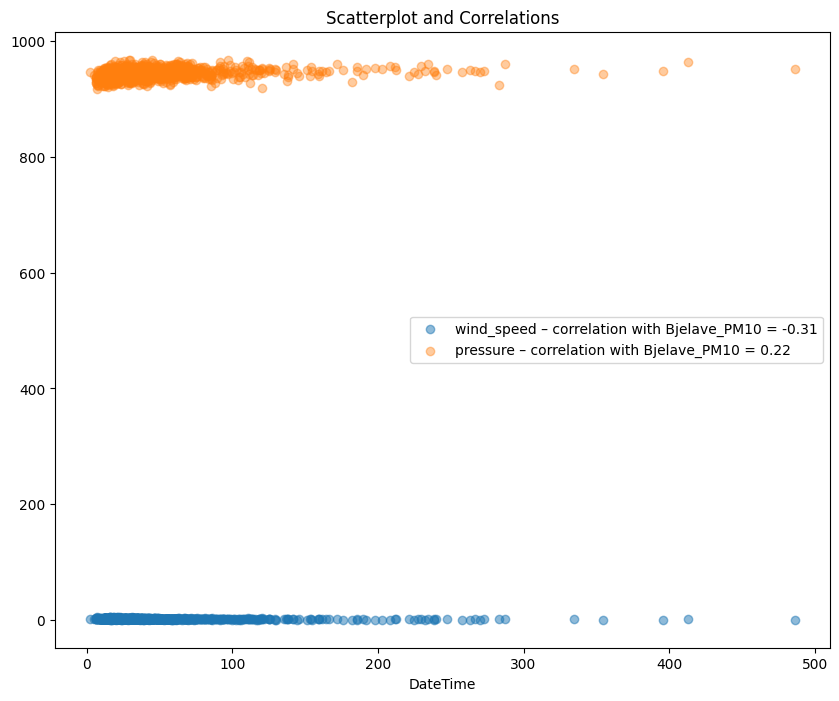

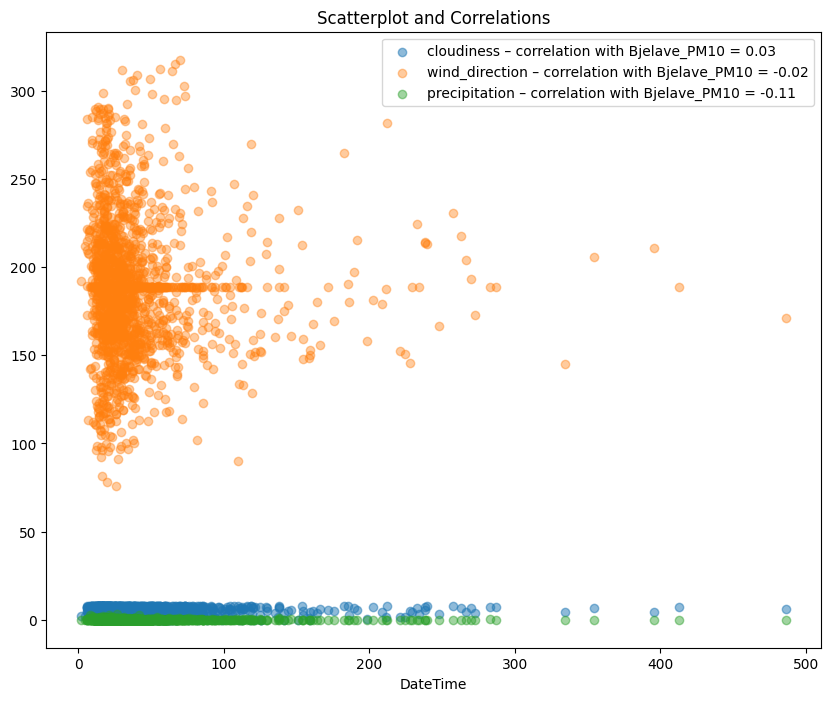

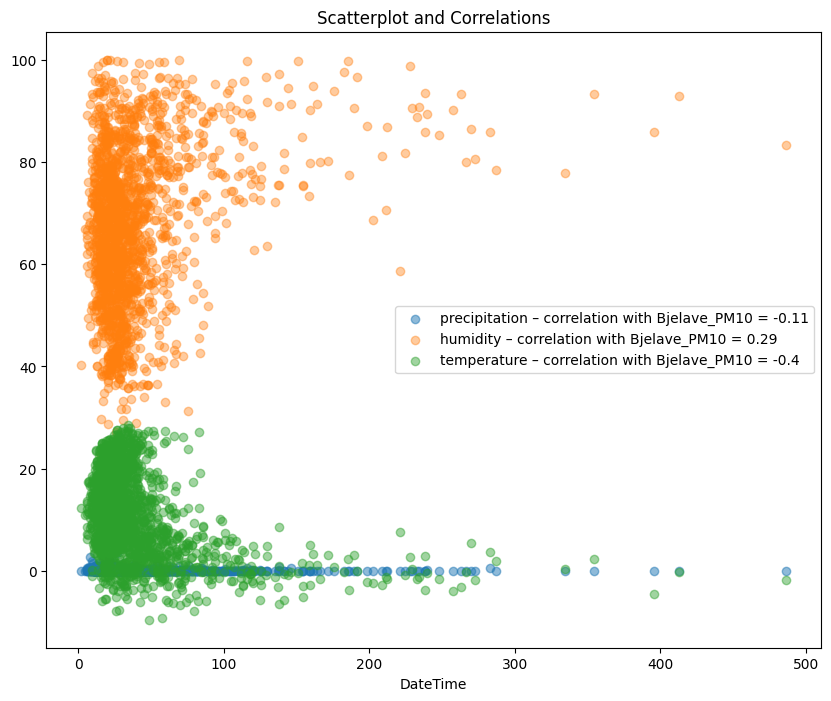

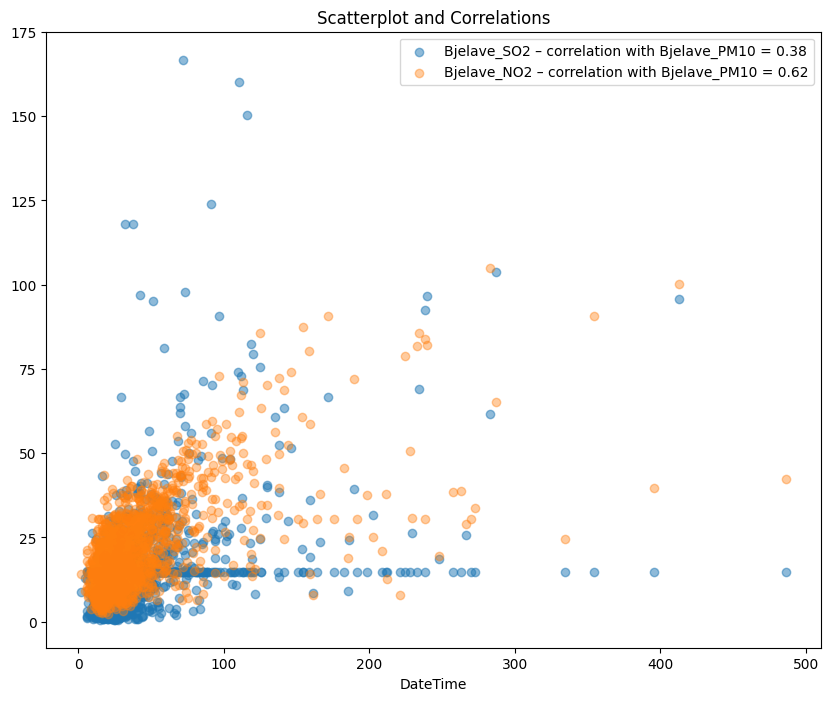

In [42]:
correlation_plot(df_processed_combined_data_daily_imputed_with_neighbors, 'Bjelave_PM10')
correlation_plot(df_processed_combined_data_daily_imputed_with_neighbors, 'Bjelave_PM10', 'cloudiness', 'wind_direction', 'precipitation')
correlation_plot(df_processed_combined_data_daily_imputed_with_neighbors, 'Bjelave_PM10', 'precipitation', 'humidity', 'temperature')
correlation_plot(df_processed_combined_data_daily_imputed_with_neighbors, 'Bjelave_PM10', 'Bjelave_SO2', 'Bjelave_NO2')


In [43]:
# Histogram and density
def plot_hd_sim(df, label, color='#0F5257', ax=1):
  sns.histplot(df[label], kde=True, bins=int(180/5), color=color, stat="density", kde_kws=dict(cut=3), alpha=.6, edgecolor=(1, 1, 1, .4), ax=ax)
  ax.set_title(label)


In [44]:
feature_columns

['DateTime',
 'Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

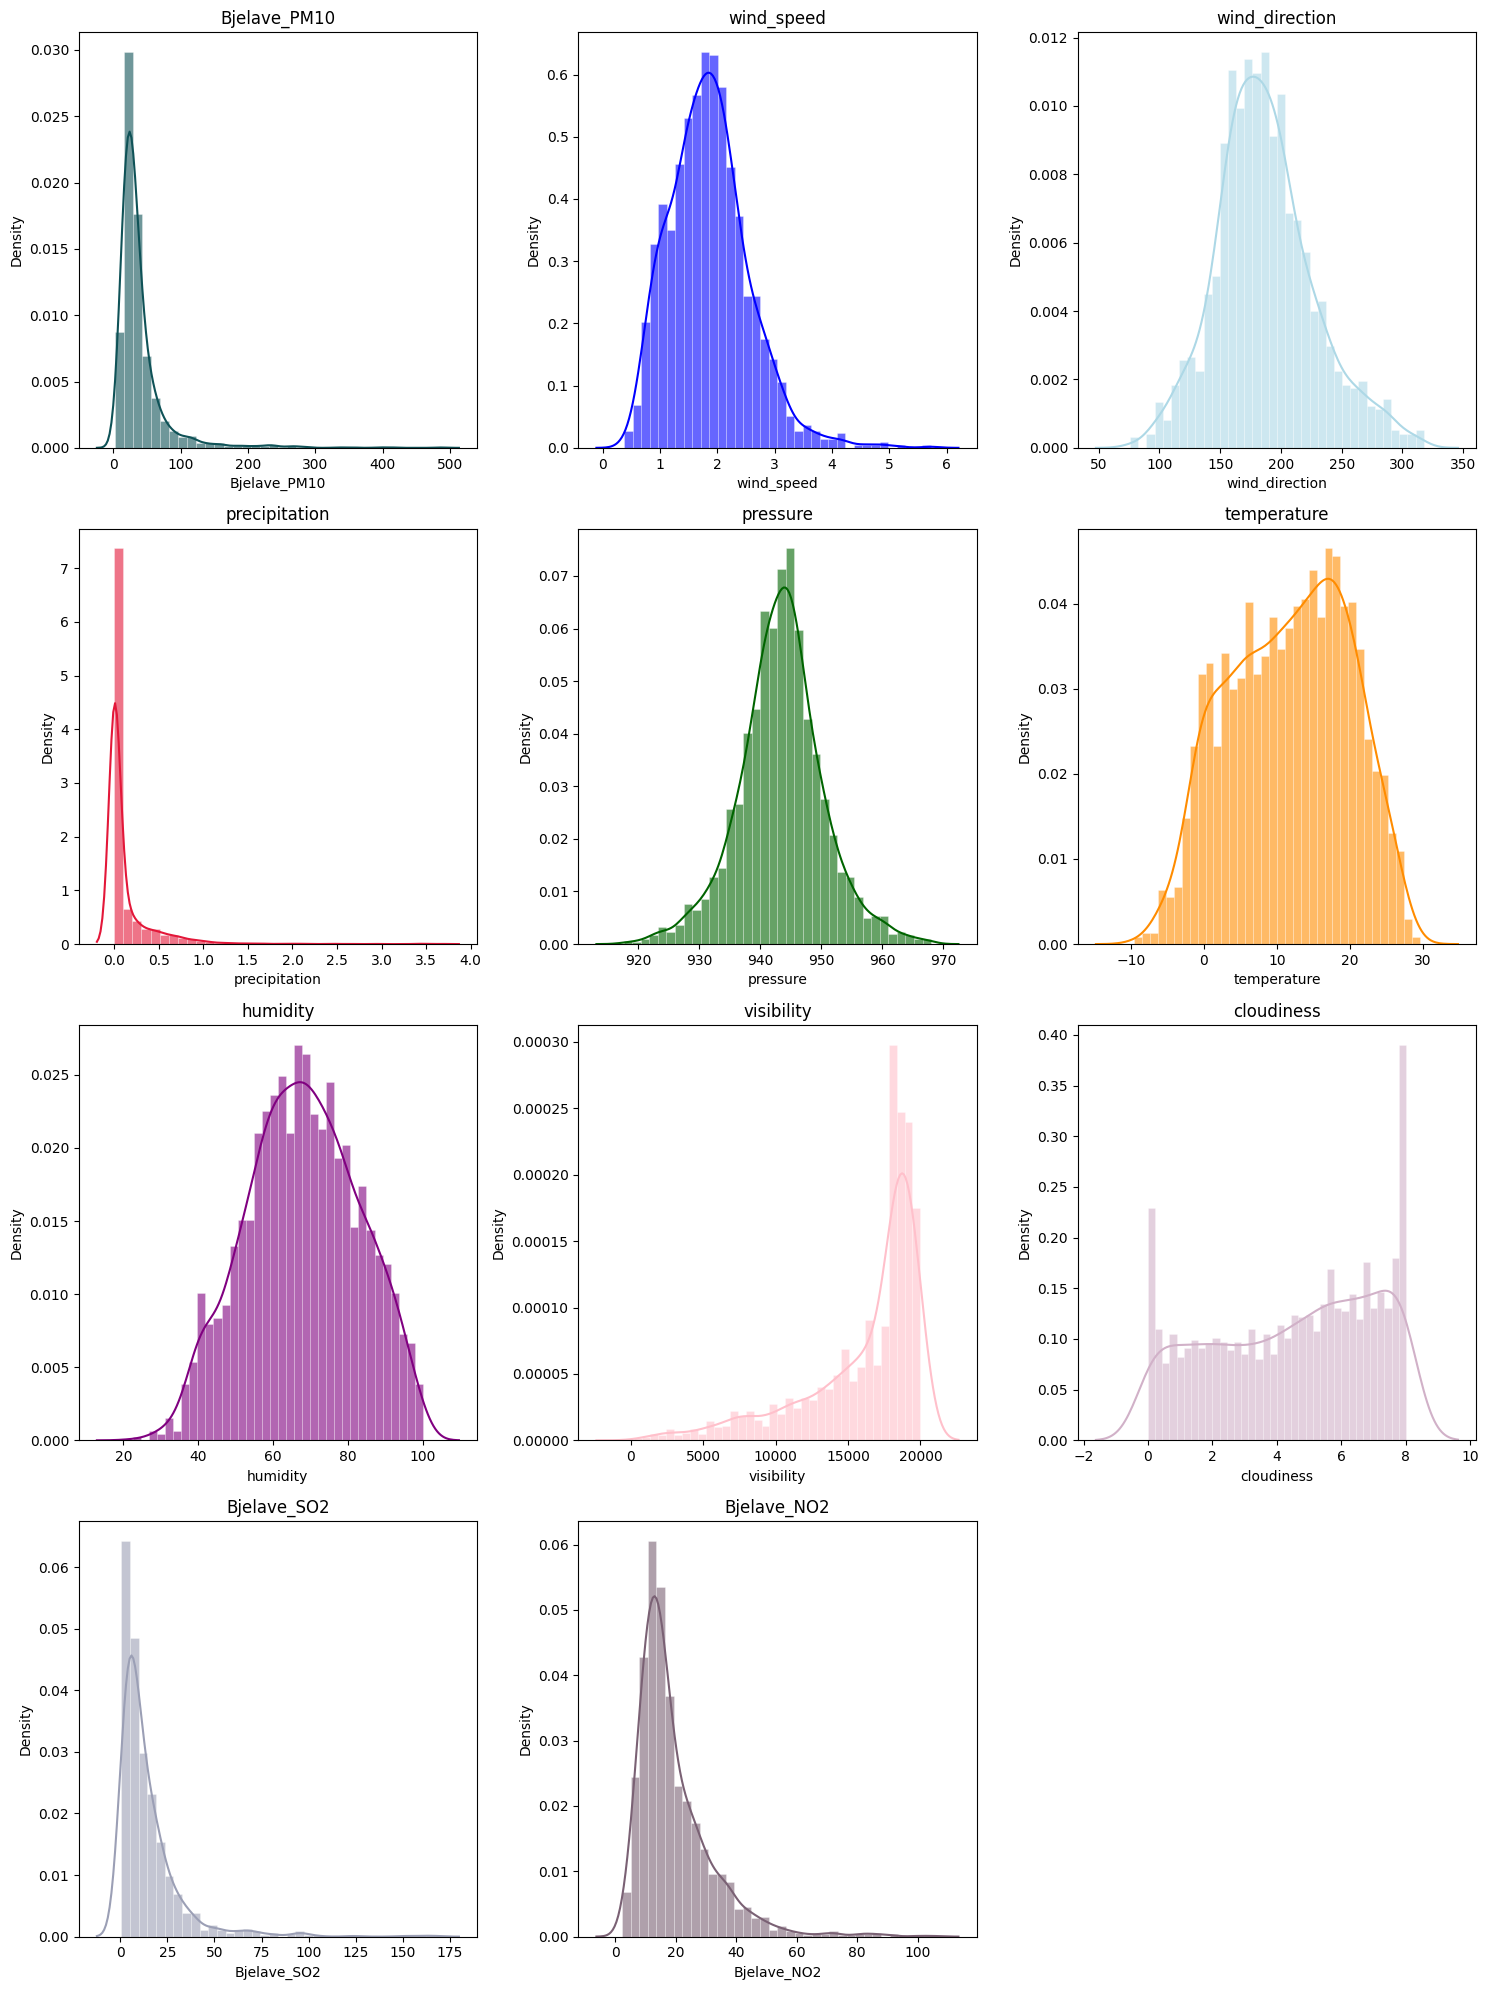

In [47]:
# dataset: df_processed_combined_data_daily

import matplotlib.pyplot as plt
import seaborn as sns
feature_columns.remove('DateTime')
num_plots = len(feature_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, (col, color) in enumerate(zip(feature_columns, colors)):
    plot_hd_sim(df_processed_combined_data_daily, col, color=color, ax=axes[i])

if num_plots < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


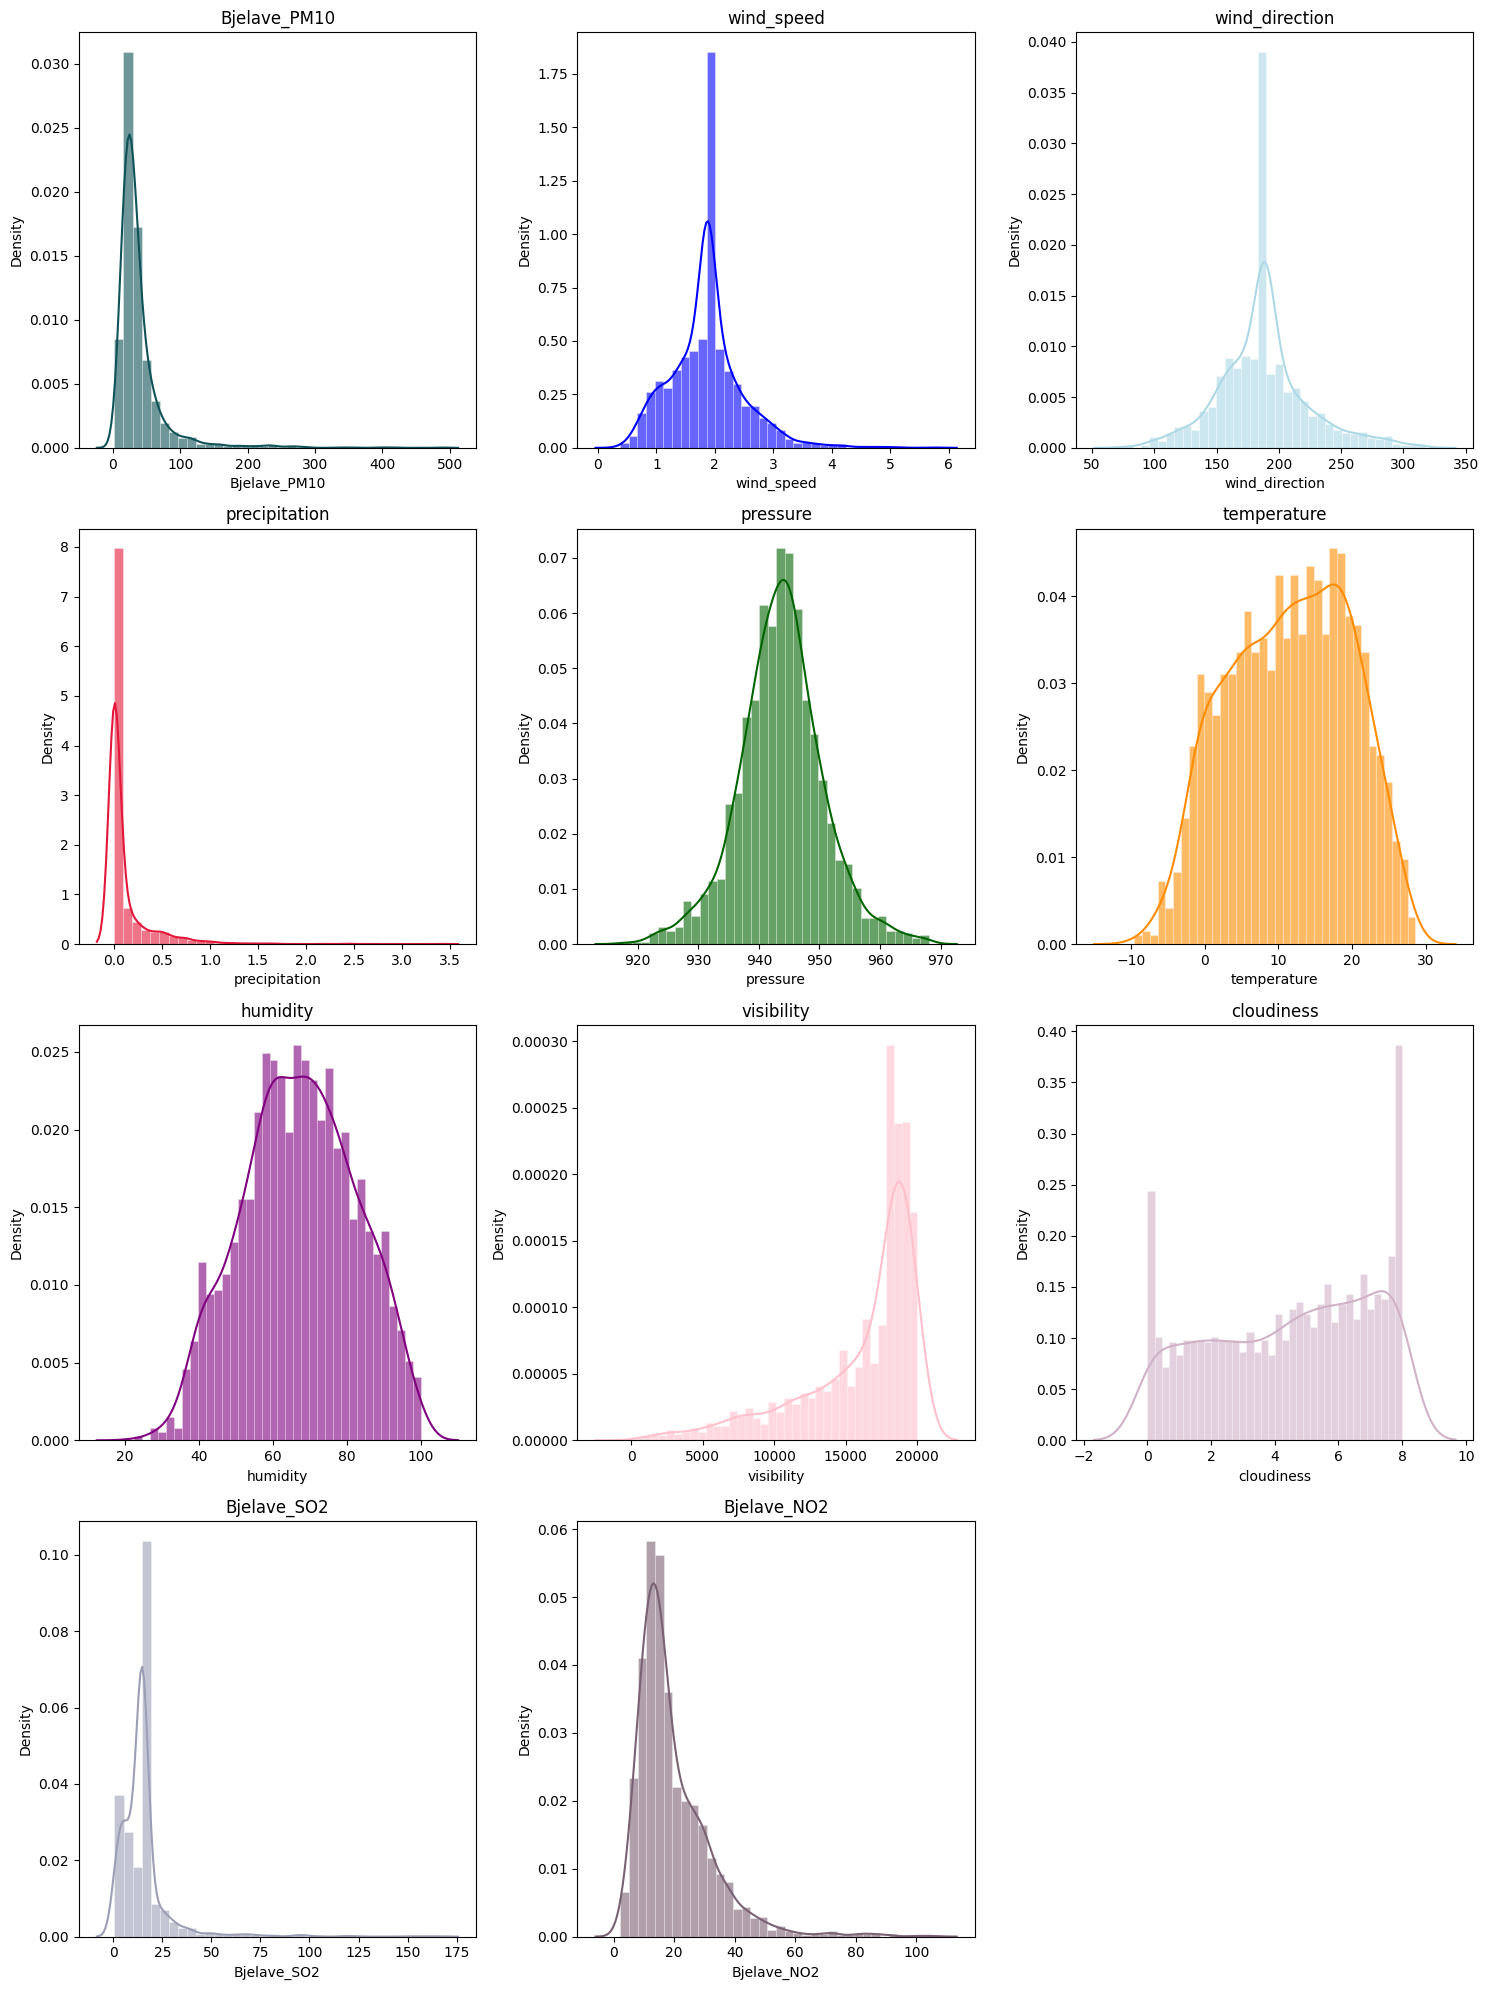

In [51]:
# dataset: df_processed_combined_data_daily_imputed_with_neighbors

import matplotlib.pyplot as plt
import seaborn as sns
num_plots = len(feature_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, (col, color) in enumerate(zip(feature_columns, colors)):
    plot_hd_sim(df_processed_combined_data_daily_imputed_with_neighbors, col, color=color, ax=axes[i])

if num_plots < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

feature_columns.insert(0,'DateTime')

In [49]:
feature_columns

['Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

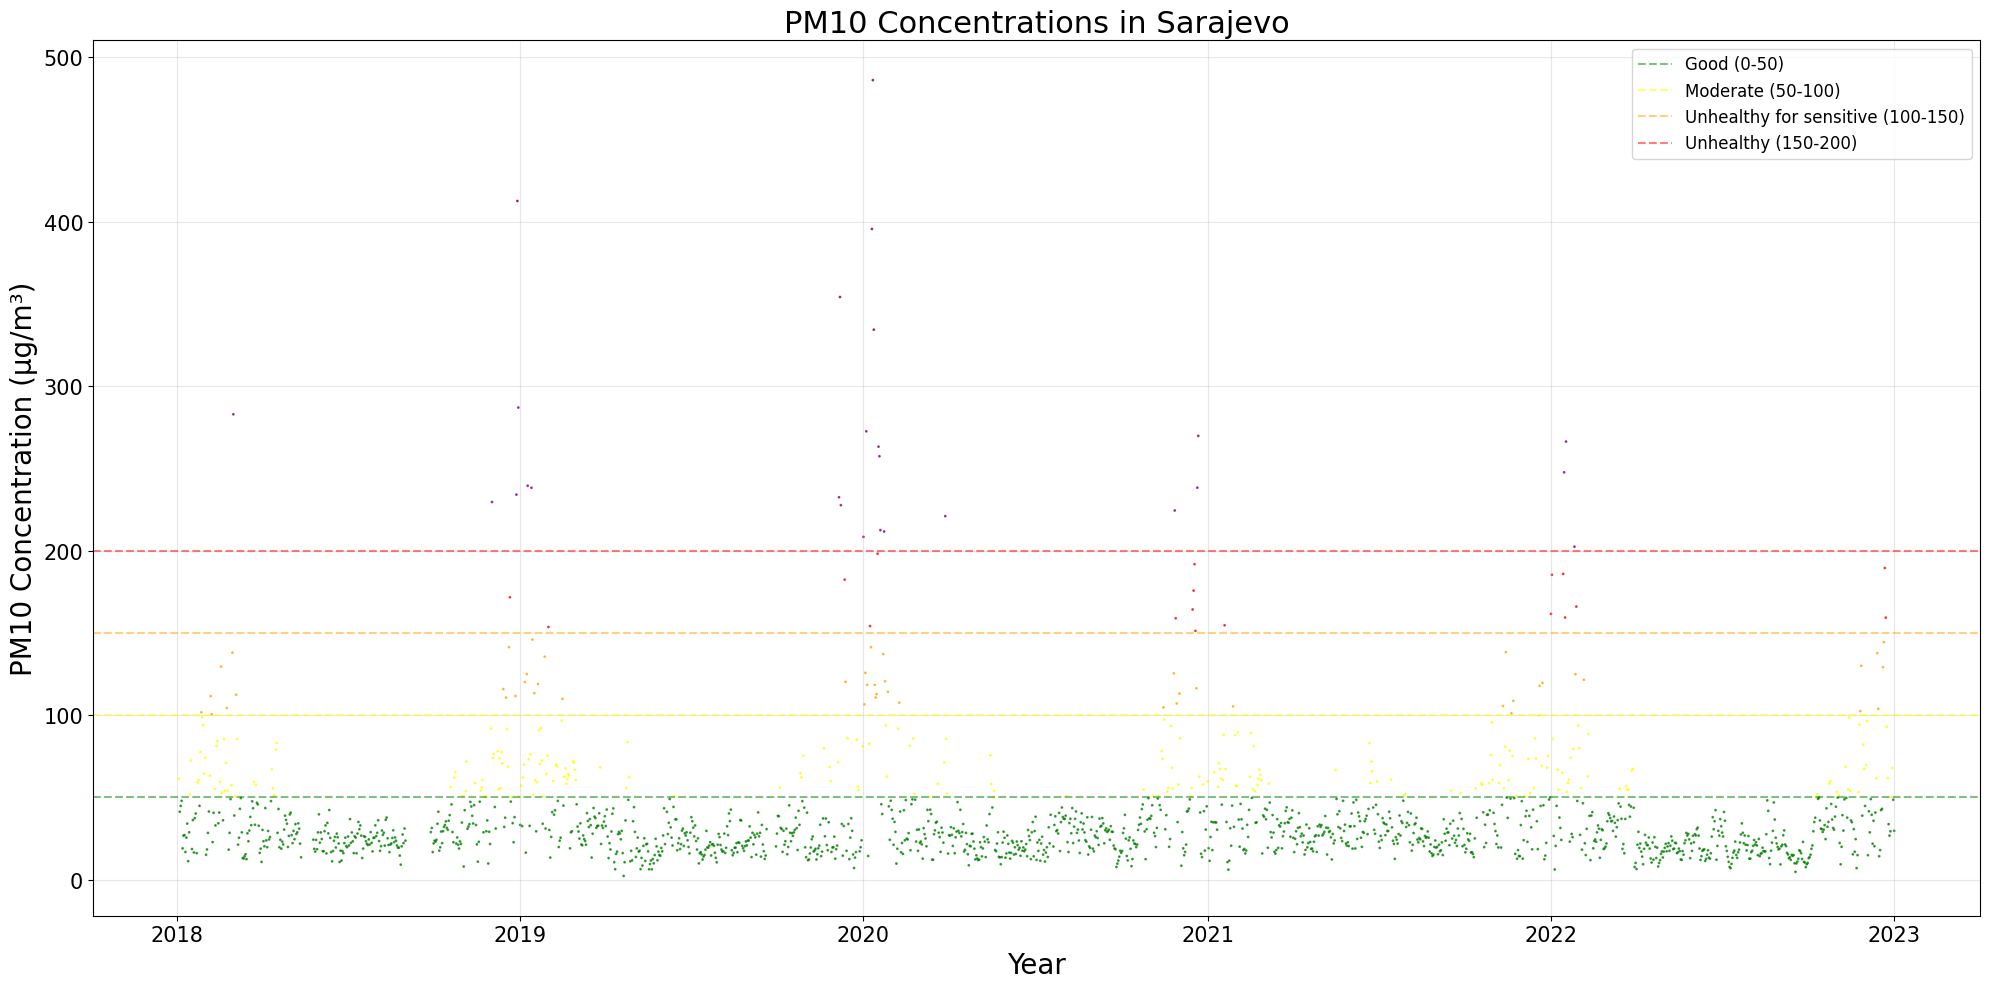

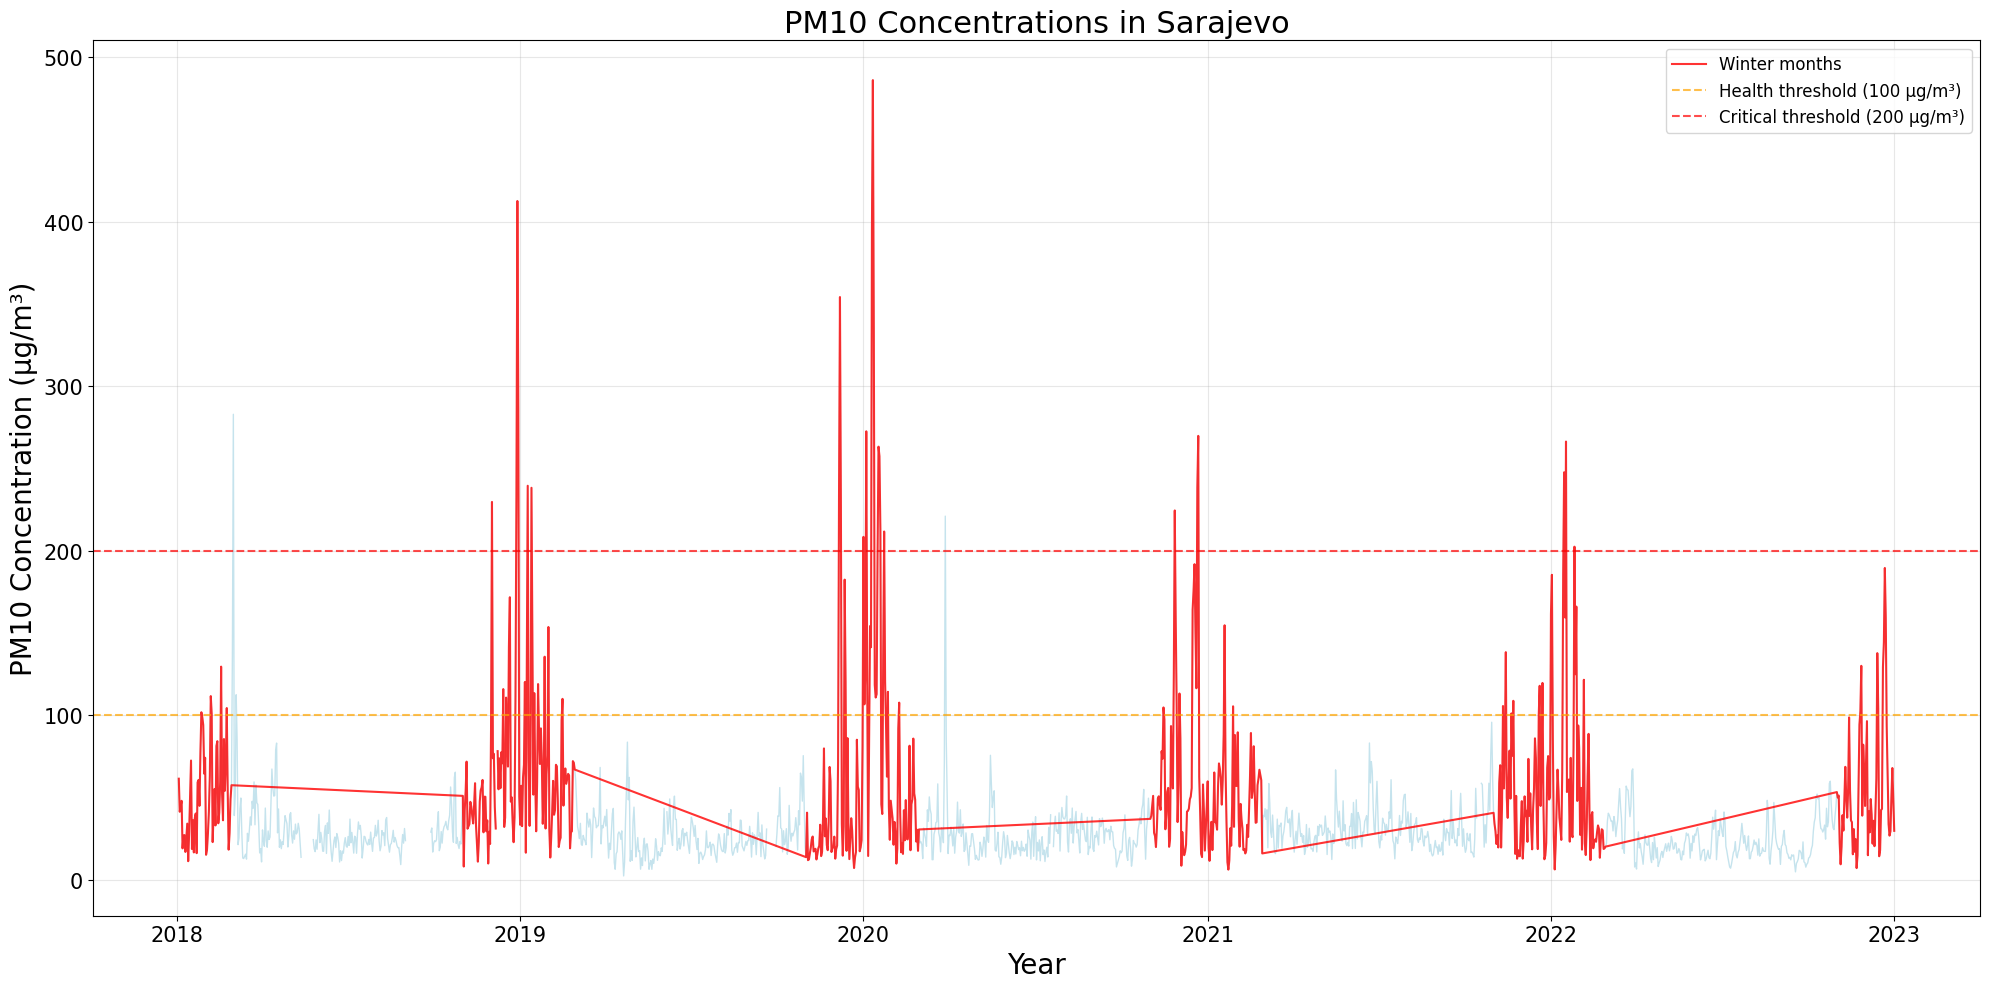

In [52]:
plt.figure(figsize=(20, 10))

def get_color_by_aqi(value):
    if pd.isna(value):
        return 'gray'
    elif value <= 50:
        return 'green'      # Good
    elif value <= 100:
        return 'yellow'     # Moderate
    elif value <= 150:
        return 'orange'     # Unhealthy for sensitive groups
    elif value <= 200:
        return 'red'        # Unhealthy
    elif value <= 300:
        return 'purple'     # Very unhealthy
    else:
        return 'maroon'     # Hazardous


colors = [get_color_by_aqi(val) for val in df_processed_combined_data_daily['Bjelave_PM10']]
plt.scatter(df_processed_combined_data_daily['DateTime'],
           df_processed_combined_data_daily['Bjelave_PM10'],
           c=colors, s=1, alpha=0.7)

df_processed_combined_data_daily['Month'] = pd.to_datetime(df_processed_combined_data_daily['DateTime']).dt.month
winter_months = [11, 12, 1, 2]  # Nov, Dec, Jan, Feb

seasonal_colors = ['red' if month in winter_months else 'lightblue'
                  for month in df_processed_combined_data_daily['Month']]




plt.axhline(y=50, color='green', linestyle='--', alpha=0.5, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', alpha=0.5, label='Moderate (50-100)')
plt.axhline(y=150, color='orange', linestyle='--', alpha=0.5, label='Unhealthy for sensitive (100-150)')
plt.axhline(y=200, color='red', linestyle='--', alpha=0.5, label='Unhealthy (150-200)')

plt.xlabel('Year', fontsize=20)
plt.ylabel('PM10 Concentration (μg/m³)', fontsize=20)
plt.title('PM10 Concentrations in Sarajevo', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(20, 10))

plt.plot(df_processed_combined_data_daily['DateTime'],
         df_processed_combined_data_daily['Bjelave_PM10'],
         color='lightblue', linewidth=1, alpha=0.7)

winter_data = df_processed_combined_data_daily[
    df_processed_combined_data_daily['Month'].isin(winter_months)
]
plt.plot(winter_data['DateTime'],
         winter_data['Bjelave_PM10'],
         color='red', linewidth=1.5, alpha=0.8, label='Winter months')

plt.axhline(y=100, color='orange', linestyle='--', alpha=0.7, label='Health threshold (100 μg/m³)')
plt.axhline(y=200, color='red', linestyle='--', alpha=0.7, label='Critical threshold (200 μg/m³)')

plt.xlabel('Year', fontsize=20)
plt.ylabel('PM10 Concentration (μg/m³)', fontsize=20)
plt.title('PM10 Concentrations in Sarajevo', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

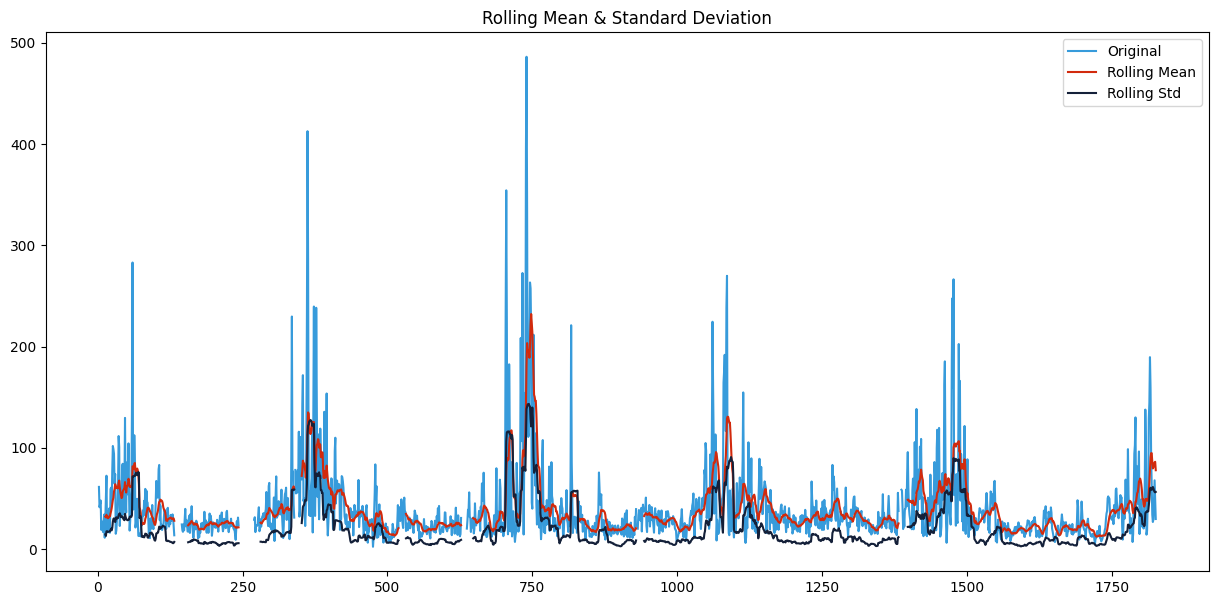

In [53]:
# df_processed_combined_data_daily
rolling_avg = df_processed_combined_data_daily["Bjelave_PM10"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolling_std = df_processed_combined_data_daily["Bjelave_PM10"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df_processed_combined_data_daily["Bjelave_PM10"], color='#379BDB', label='Original')
plt.plot(rolling_avg, color='#D22A0D', label='Rolling Mean')
plt.plot(rolling_std, color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

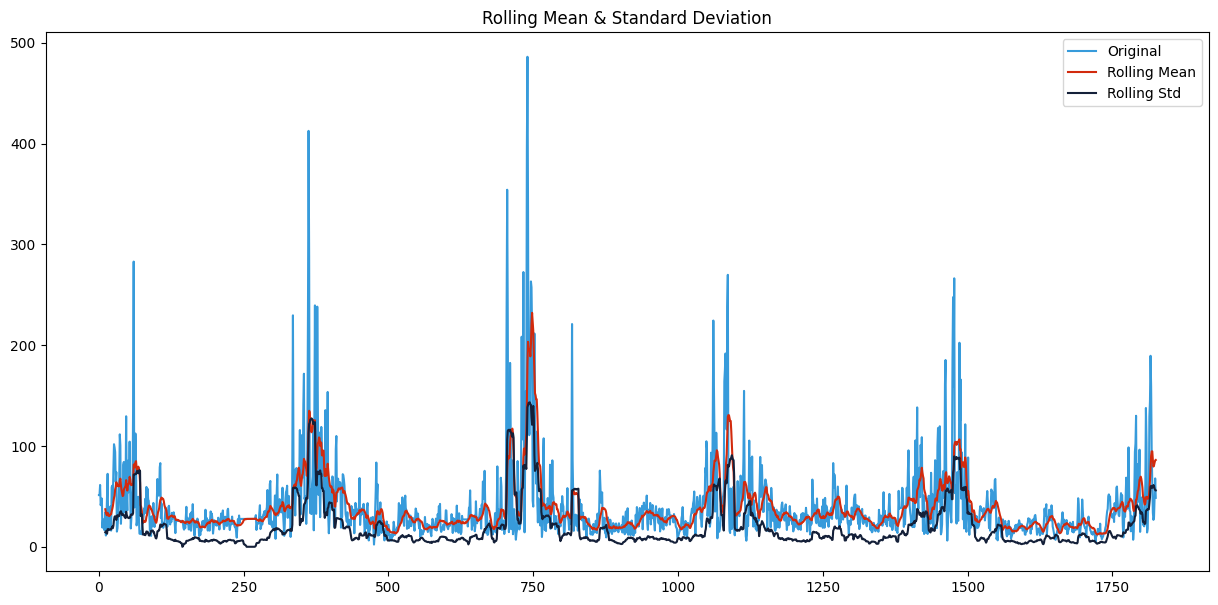

In [54]:
# df_processed_combined_data_daily_imputed_with_neighbors
rolling_avg = df_processed_combined_data_daily_imputed_with_neighbors["Bjelave_PM10"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolling_std = df_processed_combined_data_daily_imputed_with_neighbors["Bjelave_PM10"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df_processed_combined_data_daily_imputed_with_neighbors["Bjelave_PM10"], color='#379BDB', label='Original')
plt.plot(rolling_avg, color='#D22A0D', label='Rolling Mean')
plt.plot(rolling_std, color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

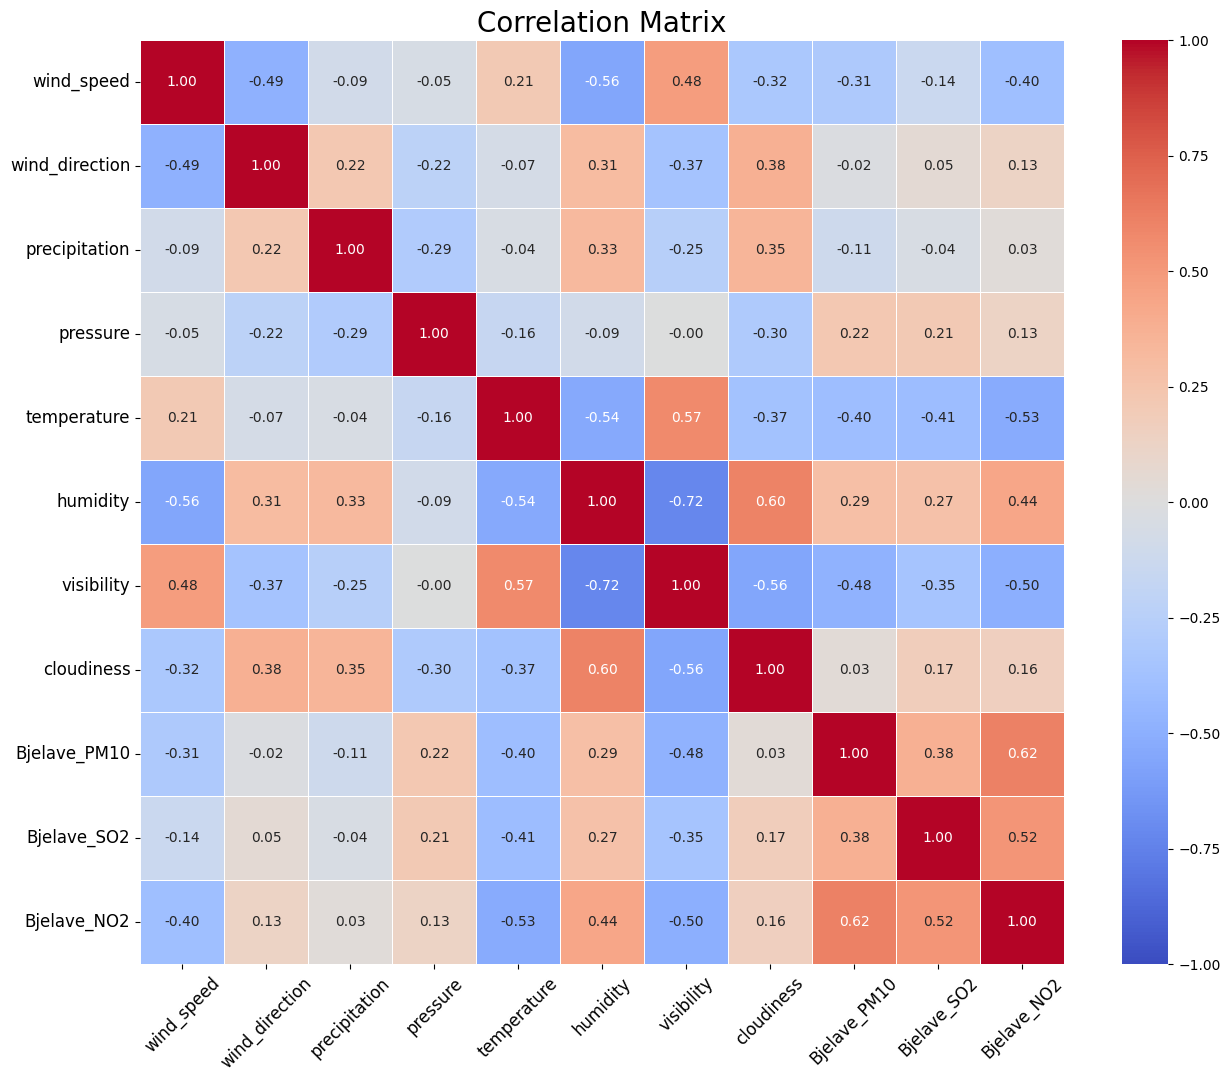

In [56]:
#df_processed_combined_data_daily_imputed_with_neighbors
selected_columns = df_processed_combined_data_daily_imputed_with_neighbors.iloc[:, 1:]

# Calculate correlation matrix
correlation_matrix = selected_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

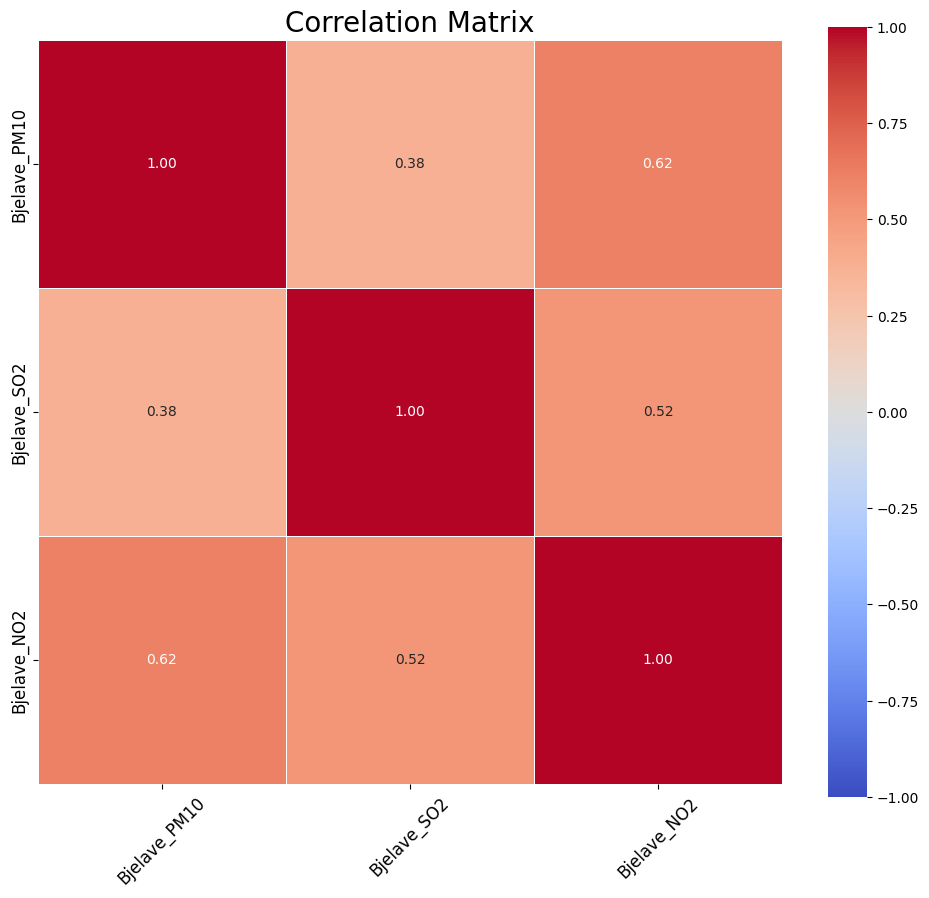

In [57]:
selected_columns = df_processed_combined_data_daily_imputed_with_neighbors.iloc[:, 9:]

# Calculate correlation matrix
correlation_matrix = selected_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

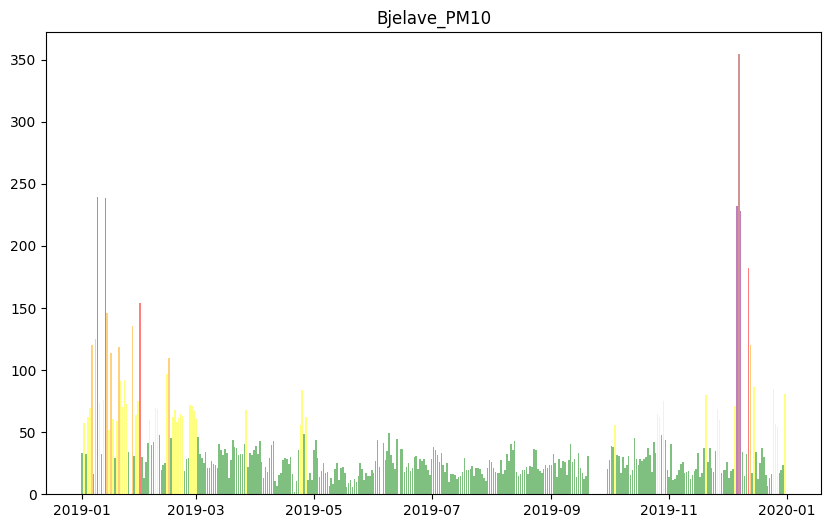

In [59]:
#df_processed_combined_data_daily
def plot_colored(df, start_date, end_date, label, categories):
    time_period = pd.date_range(start_date, end_date, freq='D')
    df = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]

    plt.figure(figsize=(10,6))

    for category in categories:
        color, start, end = category
        # plt.plot(df.loc[mask, label], color=color)
        # plt.hist(df.loc[(df[label] >= start) & (df[label] <= end), label], bins=20, color=color, alpha=0.5)
        plt.bar(df.loc[(df[label] >= start) & (df[label] <= end), "DateTime"], df.loc[(df[label] >= start) & (df[label] <= end), label], color=color, alpha=0.5)

    plt.title(label)
    plt.show()

categories = [('green', 0, 50), ('yellow', 51, 100), ('orange', 101, 150), ('red', 151, 200), ('purple', 201, 250), ('brown', 300, df_processed_combined_data_daily['Bjelave_PM10'].max())]
plot_colored(df_processed_combined_data_daily, '2019-01-01', '2019-12-31', 'Bjelave_PM10', categories)

In [68]:
feature_columns

['DateTime',
 'Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [69]:
import math
"""
feature_columns.remove('DateTime')

selected_columns = df_processed_combined_data_daily[feature_columns]
n_vars = len(selected_columns.columns)
n_cols = 2
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(selected_columns.columns):
    axes[i].hist(
        df_processed_combined_data_daily[var],
        bins=30,
        density=True,
        alpha=0.7,
        color='lightblue'
    )
    sns.kdeplot(
        data=df_processed_combined_data_daily[var],
        ax=axes[i],
        color='orange',
        linewidth=2
    )
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

for j in range(n_vars, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(
    hspace=1,
    wspace=0.3
)

plt.tight_layout()
plt.show()
feature_columns.insert(0, 'DateTime')
"""

"\nfeature_columns.remove('DateTime')\n\nselected_columns = df_processed_combined_data_daily[feature_columns]\nn_vars = len(selected_columns.columns)\nn_cols = 2\nn_rows = math.ceil(n_vars / n_cols)\n\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))\naxes = axes.flatten()\n\nfor i, var in enumerate(selected_columns.columns):\n    axes[i].hist(\n        df_processed_combined_data_daily[var],\n        bins=30,\n        density=True,\n        alpha=0.7,\n        color='lightblue'\n    )\n    sns.kdeplot(\n        data=df_processed_combined_data_daily[var],\n        ax=axes[i],\n        color='orange',\n        linewidth=2\n    )\n    axes[i].set_title(var)\n    axes[i].set_xlabel('Value')\n    axes[i].set_ylabel('Density')\n\nfor j in range(n_vars, len(axes)):\n    axes[j].axis('off')\n\nplt.subplots_adjust(\n    hspace=1,\n    wspace=0.3\n)\n\nplt.tight_layout()\nplt.show()\nfeature_columns.insert(0, 'DateTime')\n"